# House Prices Analysis and Prediction

## Introduction
This notebook provides an analysis of house prices and builds a predictive model to estimate future house prices based on historical data. We will use various data analysis and visualization techniques to understand the factors affecting house prices and then employ a machine learning model for prediction.

## Libraries Used
- **pandas**: For data manipulation and analysis.
- **numpy**: For numerical computations.
- **matplotlib**: For creating static, animated, and interactive visualizations.
- **seaborn**: For making statistical graphics.
- **warnings**: For controlling the display of warning messages.

First, we import the necessary libraries:


In [1]:
# Importing the necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical computations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For advanced data visualization

import warnings  # To handle warnings
warnings.filterwarnings('ignore')  # To ignore warnings

## Loading the Dataset
We will load the dataset containing house prices and related information. The dataset is stored in a CSV file named `zameen-updated.csv`.

Let's read the dataset into a pandas DataFrame:


In [2]:
# Reading the dataset into a DataFrame
df = pd.read_csv('zameen-updated.csv')

### Initial Data Exploration
To get an initial understanding of the dataset, we will display the first three rows. This helps us to see the structure of the data and the types of features available.

Here are the first three rows of the dataset:


In [3]:
# Displaying the first three rows of the DataFrame
df.head(3)

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,02-04-2019,NaN,NaN,Marla,4.0,0-5 Marla
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,05-04-2019,NaN,NaN,Marla,5.6,5-10 Marla
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,07-17-2019,NaN,NaN,Marla,8.0,5-10 Marla


### Checking for Missing Values
Missing values in the dataset can impact the analysis and model performance. Therefore, it's crucial to identify and handle them appropriately. We will check for missing values in each column of the dataset.

Here is the count of missing values in each column:


In [4]:
# Checking for missing values in the DataFrame
df.isnull().sum()

property_id          0
location_id          0
page_url             0
property_type        0
price                0
location             0
city                 0
province_name        0
latitude             0
longitude            0
baths                0
area                 0
purpose              0
bedrooms             0
date_added           0
agency           44071
agent            44072
Area Type            0
Area Size            0
Area Category        0
dtype: int64

### Checking for Duplicate Rows
Duplicate rows in the dataset can lead to redundant information and may affect the analysis and model performance. We will check for and count any duplicate rows in the dataset.

The number of duplicate rows in the dataset is displayed below:


In [5]:
# Check for duplicate rows in the DataFrame and count them
duplicate_count = df.duplicated().sum()

# Display the count of duplicate rows
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


### Converting Date Columns
For accurate date-related operations and analysis, it's essential to ensure that date columns are in the correct datetime format. Here, we convert the `date_added` column to datetime format.

This conversion allows us to perform operations such as sorting, filtering, and aggregating based on dates more effectively.


In [6]:
# Convert the 'date_added' column to datetime format
df['date_added'] = pd.to_datetime(df['date_added'])

### Displaying DataFrame Information
To better understand the dataset, we will display information about the DataFrame, including the number of non-null entries and the data types of each column. This summary helps us identify data types and check for any remaining missing values.

Here is the concise summary of the dataset:


In [7]:
# Displaying information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   property_id    168446 non-null  int64         
 1   location_id    168446 non-null  int64         
 2   page_url       168446 non-null  object        
 3   property_type  168446 non-null  object        
 4   price          168446 non-null  int64         
 5   location       168446 non-null  object        
 6   city           168446 non-null  object        
 7   province_name  168446 non-null  object        
 8   latitude       168446 non-null  float64       
 9   longitude      168446 non-null  float64       
 10  baths          168446 non-null  int64         
 11  area           168446 non-null  object        
 12  purpose        168446 non-null  object        
 13  bedrooms       168446 non-null  int64         
 14  date_added     168446 non-null  datetime64[ns]
 15  

### Box Plot of Property Prices
A box plot provides a visual summary of the distribution of property prices, including the median, quartiles, and potential outliers. It helps to identify the spread and skewness of the data.

In the box plot below, you can observe the distribution of property prices and identify any potential outliers in the dataset.


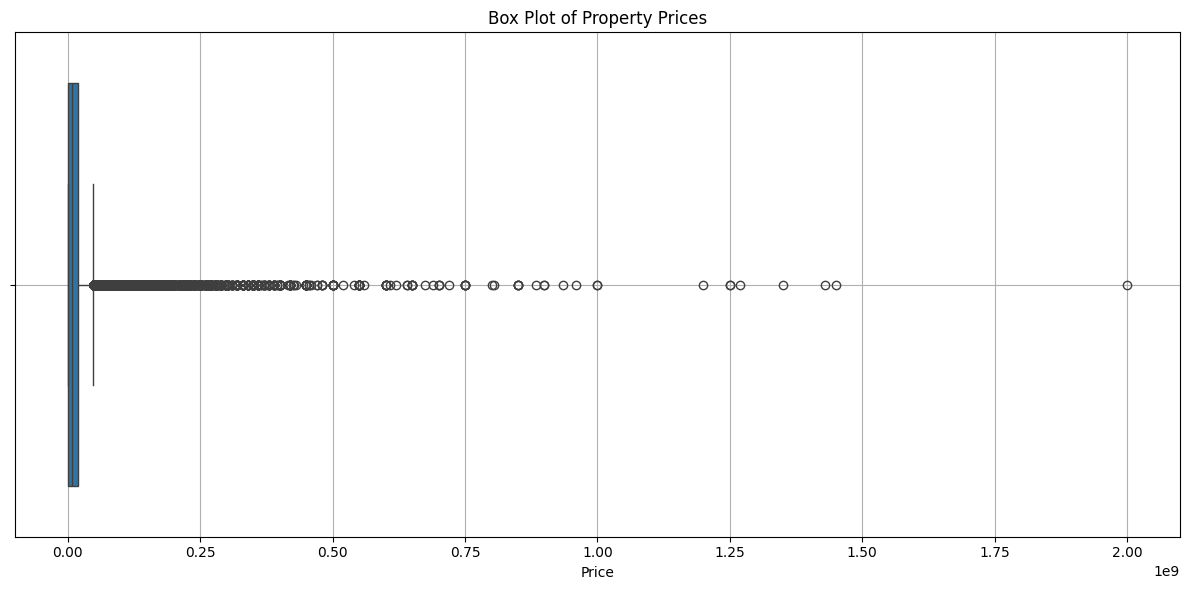

In [8]:
import seaborn as sns            # For advanced data visualization
import matplotlib.pyplot as plt  # For creating static, animated, and interactive visualizations

# Plot a box plot for the 'price' column
plt.figure(figsize=(12, 6))       # Set the figure size for the plot
sns.boxplot(x=df['price'])        # Create a box plot to visualize the distribution of property prices
plt.title('Box Plot of Property Prices')  # Set the title of the plot
plt.xlabel('Price')               # Set the x-axis label
plt.grid(True)                    # Enable grid lines for better readability
plt.tight_layout()                # Adjust the layout to fit elements within the figure area
plt.show()                        # Display the plot


### Outlier Detection and Removal
Outliers can significantly affect the analysis and modeling results. We use the Interquartile Range (IQR) method to identify and remove outliers from the `price` column. This method calculates the IQR and defines outlier bounds as 1.5 times the IQR below the 25th percentile and above the 75th percentile.

The DataFrame shape before and after removing outliers is displayed to show the impact of outlier removal on the dataset.

- **Original DataFrame shape**: The number of rows and columns before removing outliers.
- **DataFrame shape after removing outliers**: The number of rows and columns after outliers are removed.


In [9]:
# Print the shape of the DataFrame before outlier removal
print(f"Original DataFrame shape: {df.shape}")

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for the 'price' column
Q1 = df['price'].quantile(0.25)  # 25th percentile
Q3 = df['price'].quantile(0.75)  # 75th percentile

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR  # Lower bound for detecting outliers
upper_bound = Q3 + 1.5 * IQR  # Upper bound for detecting outliers

# Filter out the outliers from the DataFrame
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]  # Keep only the rows within the bounds

# Check the shape of the DataFrame before and after removing outliers
print(f"DataFrame shape after removing outliers: {df.shape}")  # Print the shape of the DataFrame after outlier removal


Original DataFrame shape: (168446, 20)
DataFrame shape after removing outliers: (154899, 20)


### Dropping Unnecessary Columns
To focus on the relevant features for our analysis, we remove columns that are not essential. In this step, we drop the columns `property_id`, `location_id`, `page_url`, `agency`, and `agent` from the dataset.

After dropping these columns, we display the first three rows of the updated DataFrame to ensure that the changes have been applied correctly and to review the remaining data.


In [10]:
# Drop unnecessary columns from the DataFrame
df = df.drop(columns=['property_id', 'location_id', 'page_url', 'agency', 'agent'])

# Display the first three rows of the updated DataFrame
df.head(3)

,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,Area Type,Area Size,Area Category
0,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,2019-02-04,Marla,4.0,0-5 Marla
1,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,2019-05-04,Marla,5.6,5-10 Marla
2,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,2019-07-17,Marla,8.0,5-10 Marla


### Aggregating and Plotting Property Counts by Year-Month
To analyze the distribution of properties over time, we first ensure that the `date_added` column is in datetime format. We then extract the year and month from this date to create a new column `year_month` for aggregation.

We count the number of properties added in each year-month period and create a DataFrame for plotting. The bar plot below visualizes the counts of properties by year and month, providing insights into how property listings vary over time.

The x-axis represents the year and month, while the y-axis shows the count of properties added in each period.


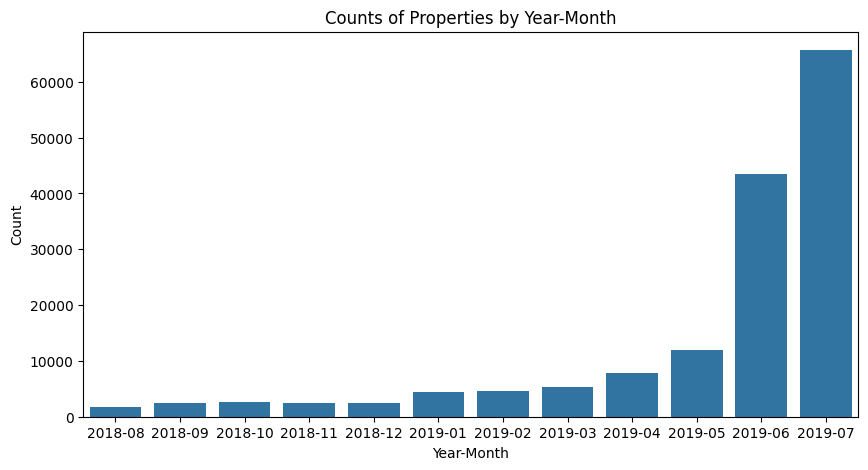

In [11]:
# Convert 'date_added' to datetime if not already
df['date_added'] = pd.to_datetime(df['date_added'])

# Extract year-month for aggregation
df['year_month'] = df['date_added'].dt.to_period('M')

# Count occurrences of each year-month
month_counts = df['year_month'].value_counts().sort_index()

# Create DataFrame for plotting
month_counts_df = month_counts.reset_index()
month_counts_df.columns = ['year_month', 'count']

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x='year_month', y='count', data=month_counts_df)
plt.xticks(rotation=0)
plt.title('Counts of Properties by Year-Month')
plt.xlabel('Year-Month')
plt.ylabel('Count')
plt.show()

### Resampling and Plotting Average Price Over Time
To analyze how the average property price changes over time, we first create a copy of the DataFrame to preserve the original data. We then set the `date_added` column as the index to facilitate time series operations.

Next, we resample the data by month and calculate the mean price for each month. This allows us to observe trends and patterns in average property prices over time.

The plot below visualizes the average price of properties for each month, providing insights into price trends and potential seasonal variations.


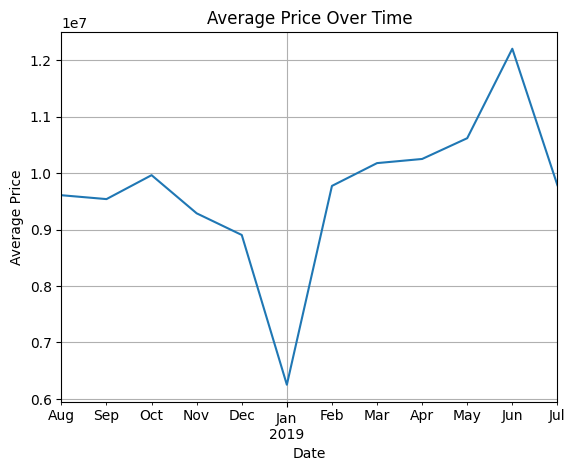

In [12]:
# Create a copy of the DataFrame
df_copy = df.copy()

# Set 'date_added' as the index in the copy
df_copy.set_index('date_added', inplace=True)

# Resample 'price' by month and calculate the mean
resampled_price = df_copy['price'].resample('M').mean()

# Plot the resampled data
resampled_price.plot()
plt.title('Average Price Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

### Resampling and Plotting Average Price Over Time
To analyze how the average property price changes over time, we first create a copy of the DataFrame to preserve the original data. We then set the `date_added` column as the index to facilitate time series operations.

Next, we resample the data by month and calculate the mean price for each month. This allows us to observe trends and patterns in average property prices over time.

The plot below visualizes the average price of properties for each month, providing insights into price trends and potential seasonal variations.


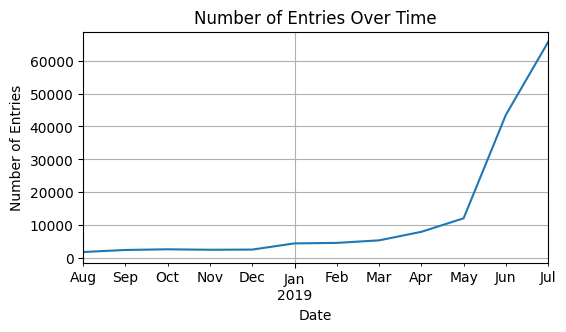

In [13]:
# Create a copy of the DataFrame
df_copy = df.copy()

# Set 'date_added' as the index in the copy
df_copy.set_index('date_added', inplace=True)

# Resample by month and count the number of entries
resampled_counts = df_copy.resample('M').size()

# Plot the resampled counts
plt.figure(figsize=(6, 3))
resampled_counts.plot()
plt.title('Number of Entries Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Entries')
plt.grid(True)
plt.show()

### Counts of Properties by City
To understand the distribution of properties across different cities, we first count the number of properties listed in each city. We then create a DataFrame from these counts for easy plotting.

The bar plot below shows the number of properties in each city. The x-axis represents the cities, while the y-axis displays the count of properties. This visualization helps to identify which cities have the highest and lowest number of property listings.


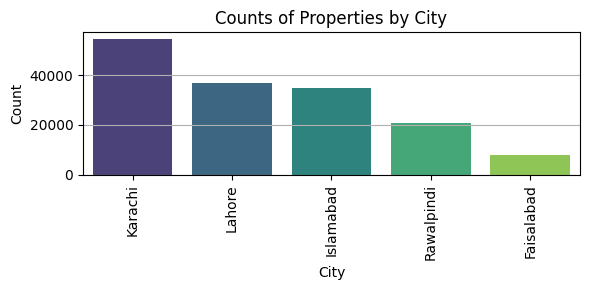

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the unique values in the 'city' column
city_counts = df['city'].value_counts()

# Create a DataFrame from the series for plotting
city_counts_df = city_counts.reset_index()
city_counts_df.columns = ['city', 'count']

# Plot
plt.figure(figsize=(6, 3))
sns.barplot(x='city', y='count', data=city_counts_df, palette='viridis')
plt.xticks(rotation=90)
plt.title('Counts of Properties by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### Average Price of Properties by City
To analyze property prices across different cities, we first ensure that the `price` column is numeric and handle any errors by converting invalid entries to NaN. We then drop rows with NaN values in the `price` column to ensure accurate calculations.

We compute the average price of properties for each city and create a DataFrame for easy plotting. The DataFrame is sorted in descending order of average price to highlight cities with the highest average property prices.

The bar plot below illustrates the average price of properties by city. The x-axis represents the cities, while the y-axis shows the average price. This visualization helps to compare property prices across different cities.


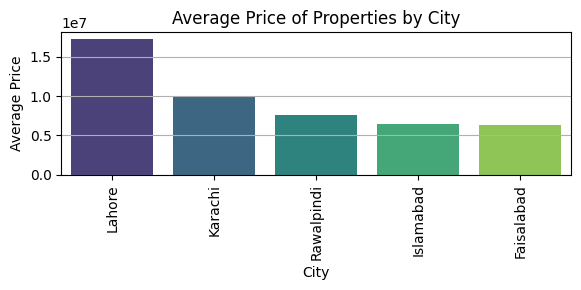

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'price' column is numeric, coercing errors to NaN
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Drop rows where 'price' is NaN
df = df.dropna(subset=['price'])

# Calculate the average price for each city
city_avg_price = df.groupby('city')['price'].mean()

# Create a DataFrame from the series for plotting
city_avg_price_df = city_avg_price.reset_index()
city_avg_price_df.columns = ['city', 'average_price']

# Sort the DataFrame by 'average_price' in descending order
city_avg_price_df = city_avg_price_df.sort_values(by='average_price', ascending=False)

# Plot
plt.figure(figsize=(6, 3))
sns.barplot(x='city', y='average_price', data=city_avg_price_df, palette='viridis')
plt.xticks(rotation=90)
plt.title('Average Price of Properties by City')
plt.xlabel('City')
plt.ylabel('Average Price')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### Counts of Properties by Purpose
To analyze the distribution of properties based on their purpose (e.g., sale, rent), we first count the number of properties for each purpose. This is done using the `value_counts()` method on the `purpose` column.

We then create a DataFrame from these counts for plotting. The bar plot below shows the number of properties for each purpose, providing insights into the most common purposes for which properties are listed.

The x-axis represents the different purposes, while the y-axis displays the count of properties for each purpose. This visualization helps to understand the focus of the property listings and the distribution between different types of property purposes.


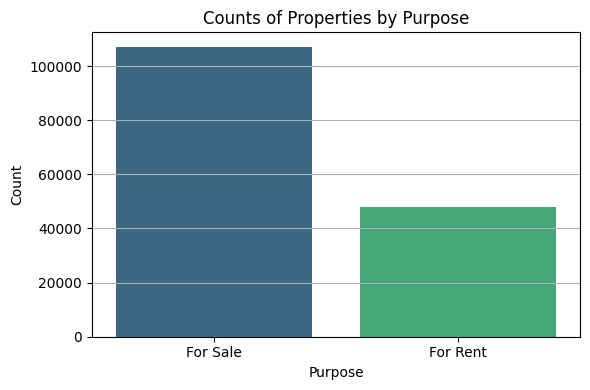

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the unique values in the 'purpose' column
purpose_counts = df['purpose'].value_counts()

# Create a DataFrame from the series for plotting
purpose_counts_df = purpose_counts.reset_index()
purpose_counts_df.columns = ['purpose', 'count']

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x='purpose', y='count', data=purpose_counts_df, palette='viridis')
plt.title('Counts of Properties by Purpose')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### Displaying the DataFrame
To review the contents and structure of the DataFrame, we display it in its entirety. This allows us to inspect the data and ensure that the previous data processing steps have been applied correctly.

Below, you will find the DataFrame as it stands after all previous data manipulation and cleaning steps.


In [17]:
# Display the DataFrame to review its contents
df

,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,Area Type,Area Size,Area Category,year_month
0,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,2019-02-04,Marla,4.0,0-5 Marla,2019-02
1,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,2019-05-04,Marla,5.6,5-10 Marla,2019-05
2,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,2019-07-17,Marla,8.0,5-10 Marla,2019-07
3,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,2019-04-05,Kanal,2.0,1-5 Kanal,2019-04
4,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,2019-07-10,Marla,8.0,5-10 Marla,2019-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168441,House,26500000,Gadap Town,Karachi,Sindh,25.029909,67.137192,0,9.6 Marla,For Sale,6,2019-07-18,Marla,9.6,5-10 Marla,2019-07
168442,House,12500000,Gadap Town,Karachi,Sindh,25.017951,67.136393,0,8 Marla,For Sale,3,2019-07-18,Marla,8.0,5-10 Marla,2019-07
168443,House,27000000,Gadap Town,Karachi,Sindh,25.015384,67.116330,0,9.6 Marla,For Sale,6,2019-07-18,Marla,9.6,5-10 Marla,2019-07
168444,House,11000000,Gadap Town,Karachi,Sindh,25.013265,67.120818,0,7.8 Marla,For Sale,3,2019-07-18,Marla,7.8,5-10 Marla,2019-07


### Converting Area to Marla and Updating the Area Column
To standardize the area measurement in the dataset, we convert all area sizes to Marla. The conversion function handles cases where the `Area Type` is 'Kanal', converting it to Marla by multiplying the size by 20 (since 1 Kanal is equivalent to 20 Marla).

After applying the conversion, we update the `Area Type` to 'Marla' to reflect the new standard. Additionally, we create a new column `area` that combines the `Area Size` with the unit 'Marla' for a clear and consistent representation.

The updated DataFrame reflects these changes, and you can review the results below.


In [18]:
# Function to convert area to Marla
def convert_to_marla(row):
    if row['Area Type'] == 'Kanal':
        return row['Area Size'] * 20
    return row['Area Size']

# Apply the conversion
df['Area Size'] = df.apply(convert_to_marla, axis=1)
df['Area Type'] = 'Marla'


# Update the 'area' column to reflect the changes
df['area'] = df['Area Size'].astype(str) + ' Marla'

df

,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,Area Type,Area Size,Area Category,year_month
0,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4.0 Marla,For Sale,2,2019-02-04,Marla,4.0,0-5 Marla,2019-02
1,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,2019-05-04,Marla,5.6,5-10 Marla,2019-05
2,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8.0 Marla,For Sale,5,2019-07-17,Marla,8.0,5-10 Marla,2019-07
3,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,40.0 Marla,For Sale,4,2019-04-05,Marla,40.0,1-5 Kanal,2019-04
4,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8.0 Marla,For Sale,3,2019-07-10,Marla,8.0,5-10 Marla,2019-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168441,House,26500000,Gadap Town,Karachi,Sindh,25.029909,67.137192,0,9.6 Marla,For Sale,6,2019-07-18,Marla,9.6,5-10 Marla,2019-07
168442,House,12500000,Gadap Town,Karachi,Sindh,25.017951,67.136393,0,8.0 Marla,For Sale,3,2019-07-18,Marla,8.0,5-10 Marla,2019-07
168443,House,27000000,Gadap Town,Karachi,Sindh,25.015384,67.116330,0,9.6 Marla,For Sale,6,2019-07-18,Marla,9.6,5-10 Marla,2019-07
168444,House,11000000,Gadap Town,Karachi,Sindh,25.013265,67.120818,0,7.8 Marla,For Sale,3,2019-07-18,Marla,7.8,5-10 Marla,2019-07


### Counts of Unique Values in 'Area Category'
To understand the distribution of property area categories in the dataset, we count the occurrences of each unique value in the `Area Category` column.

The output below provides the number of properties falling under each area category, giving insights into the distribution and prevalence of different area classifications in the dataset.


In [19]:
# Count the unique values in the 'Area Category' column
area_category_counts = df['Area Category'].value_counts()  # Count occurrences of each category in the 'Area Category' column

# Display the counts
area_category_counts


Area Category
0-5 Marla        64430
5-10 Marla       55770
1-5 Kanal        19935
10-15 Marla      12186
15-20 Marla       2303
5-10 Kanal         174
15-20 Kanal         33
10-15 Kanal         18
20-30 Kanal         14
30-40 Kanal          9
40-50 Kanal          8
400-500 Kanal        5
60-70 Kanal          5
80-90 Kanal          3
100-200 Kanal        2
500-600 Kanal        1
600-700 Kanal        1
70-80 Kanal          1
700-800 Kanal        1
Name: count, dtype: int64

### Counts of Unique Area Categories
To understand the distribution of different area categories in the dataset, we count the number of properties in each area category. This helps us see how frequently each category appears.

The bar plot below illustrates the number of properties for each unique area category. The x-axis represents the different area categories, while the y-axis shows the count of properties in each category. This visualization helps to identify which area categories are most and least common in the dataset.


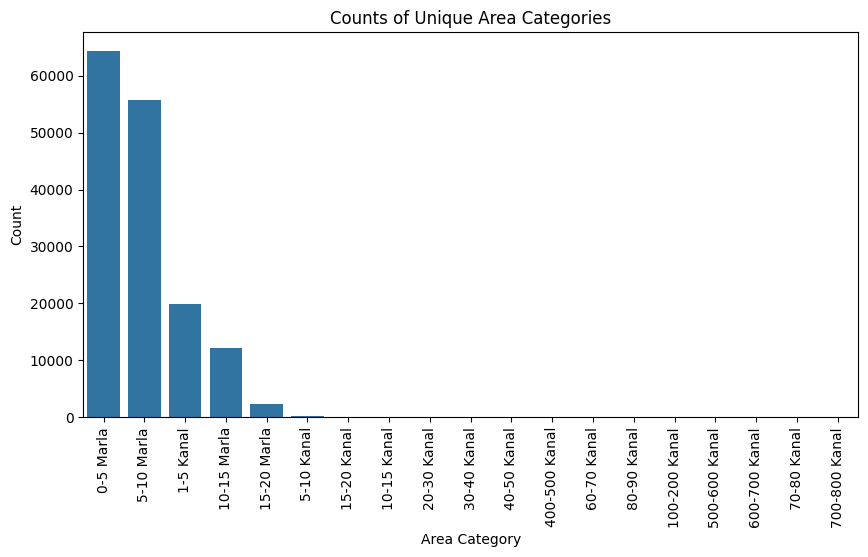

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the unique values in the 'Area Category' column
area_category_counts = df['Area Category'].value_counts()

# Create a DataFrame from the series for plotting
area_category_counts_df = area_category_counts.reset_index()
area_category_counts_df.columns = ['Area Category', 'Count']

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x='Area Category', y='Count', data=area_category_counts_df)
plt.xticks(rotation=90)
plt.title('Counts of Unique Area Categories')
plt.xlabel('Area Category')
plt.ylabel('Count')
plt.show()


### Top 20 Areas in Islamabad
To gain insights into the distribution of properties within Islamabad, we filter the dataset to include only properties located in this city. We then count the occurrences of each location and identify the top 20 locations with the highest number of properties.

The bar plot below shows the top 20 locations in Islamabad, where the x-axis represents the area locations and the y-axis represents the number of properties in each location. This visualization helps us understand which areas are most densely populated with properties and can provide valuable information for market analysis and decision-making.


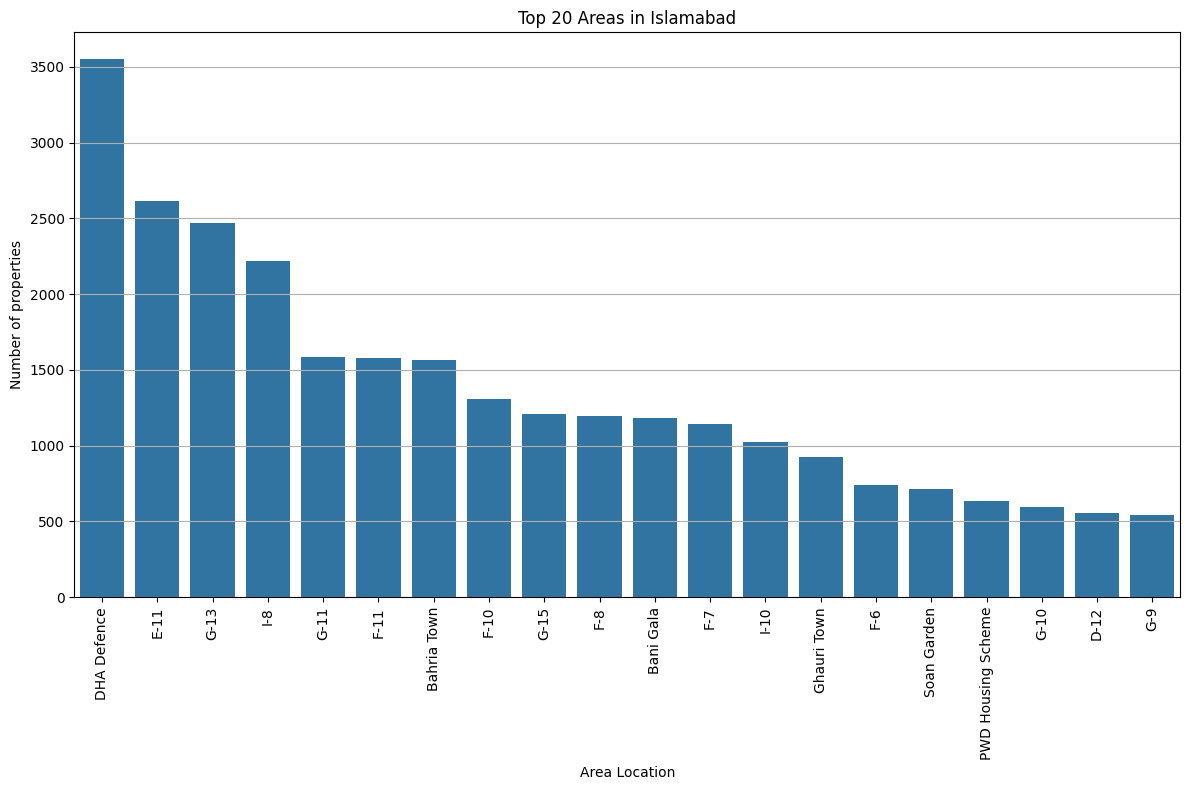

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter rows where city is 'Islamabad'
islamabad_df = df[df['city'] == 'Islamabad']

# Count the occurrences of each location
location_counts = islamabad_df['location'].value_counts()

# Get the top 20 locations
top_20_locations = location_counts.head(20)  #  for top 20 locations

# Create a DataFrame from the series for plotting
top_20_locations_df = top_20_locations.reset_index()
top_20_locations_df.columns = ['location', 'count']

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='location', y='count', data=top_20_locations_df)
plt.xticks(rotation=90)
plt.title('Top 20 Areas in Islamabad')
plt.xlabel('Area Location')
plt.ylabel('Number of properties')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### Top 20 Area Locations in Islamabad: Average Price and Number of Properties
To gain a deeper understanding of the property distribution in Islamabad, we visualize the top 20 area locations based on the number of properties. The plot below provides dual insights:

- **Average Price**: Displayed on the primary y-axis (blue line) to show the average price of properties in each location.
- **Number of Properties**: Displayed on the secondary y-axis (red line) to indicate the count of properties in each location.

The x-axis represents the top 20 area locations, while the left y-axis shows the average property price and the right y-axis shows the number of properties. This dual-axis plot allows us to observe trends and compare the average price with the number of properties across different locations.

The plot uses gridlines for better readability, and x-axis labels are rotated for clarity.


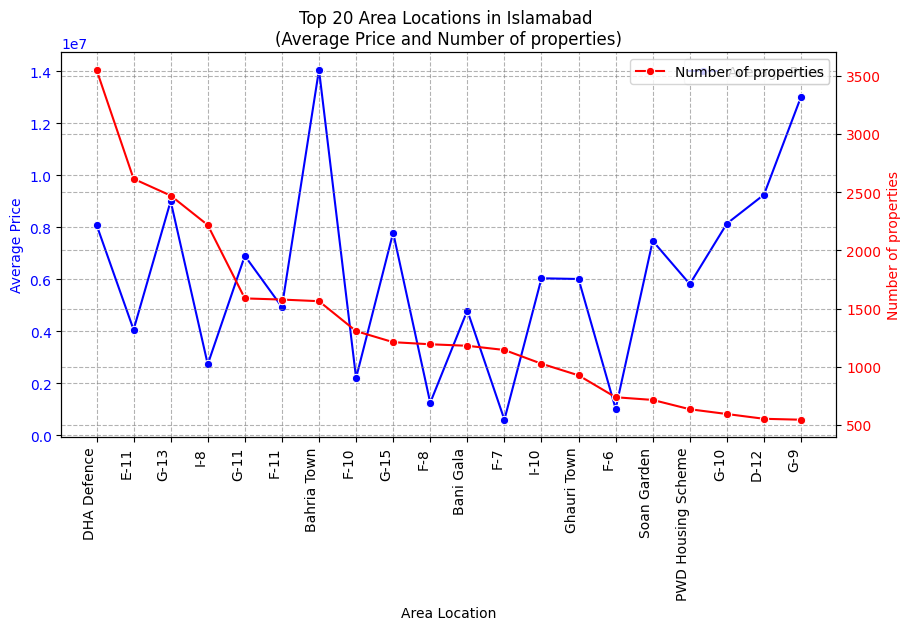

In [22]:
# Filter rows where city is 'Islamabad'
islamabad_df = df[df['city'] == 'Islamabad']

# Count the occurrences of each location
location_counts = islamabad_df['location'].value_counts()

# Calculate the average price for each location
location_avg_price = islamabad_df.groupby('location')['price'].mean()

# Merge counts and average prices
location_summary = pd.DataFrame({
    'count': location_counts,
    'average_price': location_avg_price
}).reset_index()
location_summary.columns = ['location', 'count', 'average_price']

# Sort by counts to arrange the locations on the x-axis
location_summary_sorted = location_summary.sort_values(by='count', ascending=False).head(20)

# Plot
fig, ax1 = plt.subplots(figsize=(10, 5))  # Set figure size here

# Line plot for average price
sns.lineplot(x='location', y='average_price', data=location_summary_sorted, ax=ax1, color='b', marker='o', label='Average Price')
ax1.set_xlabel('Area Location')
ax1.set_ylabel('Average Price', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for counts
ax2 = ax1.twinx()
sns.lineplot(x='location', y='count', data=location_summary_sorted, ax=ax2, color='r', marker='o', label='Number of properties')
ax2.set_ylabel('Number of properties', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Rotate x-axis labels
ax1.set_xticks(location_summary_sorted['location'])  # Ensure all locations are shown
ax1.set_xticklabels(location_summary_sorted['location'], rotation=90, ha='right')

# Set title
plt.title('Top 20 Area Locations in Islamabad \n(Average Price and Number of properties)')

# Add light-colored gridlines
ax1.grid(True, linestyle='--', color='gray', alpha=0.6)
ax2.grid(True, linestyle='--', color='gray', alpha=0.6)

# Show plot
plt.show()


### Top 20 Locations in Karachi
To better understand the property distribution in Karachi, we focus on the top 20 locations with the highest number of properties. The bar plot below visualizes these top locations:

- **X-Axis**: Represents the top 20 area locations in Karachi.
- **Y-Axis**: Shows the number of properties in each location.

The x-axis labels are rotated to vertical to accommodate longer names and enhance readability. Gridlines are added to the y-axis to improve visual clarity. This plot provides valuable insights into the most popular areas in Karachi based on property count.


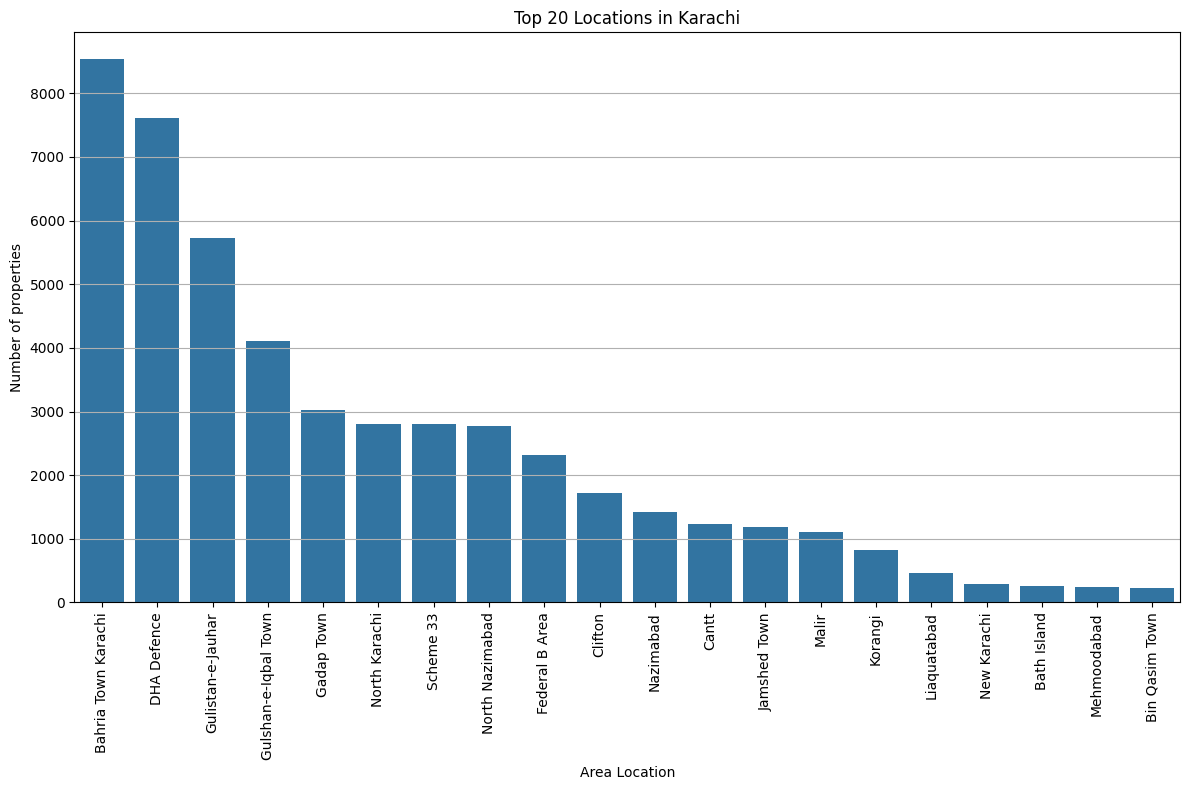

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter rows where city is 'Karachi'
karachi_df = df[df['city'] == 'Karachi']

# Count the occurrences of each location
location_counts = karachi_df['location'].value_counts()

# Get the top 20 locations
top_20_locations = location_counts.head(20)  # Changed to 20 for top 20 locations

# Create a DataFrame from the series for plotting
top_20_locations_df = top_20_locations.reset_index()
top_20_locations_df.columns = ['location', 'count']

# Plot
plt.figure(figsize=(12, 8))  # Increased figure size for better readability
sns.barplot(x='location', y='count', data=top_20_locations_df)
plt.xticks(rotation=90)
plt.title('Top 20 Locations in Karachi')
plt.xlabel('Area Location')
plt.ylabel('Number of properties')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### Top 20 Locations in Karachi: Average Price and Number of Properties

This plot illustrates the top 20 locations in Karachi based on the number of properties. It provides a dual-axis line plot with the following features:

- **X-Axis**: Represents the top 20 area locations in Karachi.
- **Left Y-Axis**: Shows the average price of properties in each location (in blue).
- **Right Y-Axis**: Displays the number of properties in each location (in red).

The x-axis labels are rotated vertically to ensure all location names are visible. Light gridlines are added for better visual clarity. This visualization helps compare property counts and average prices across different locations in Karachi.


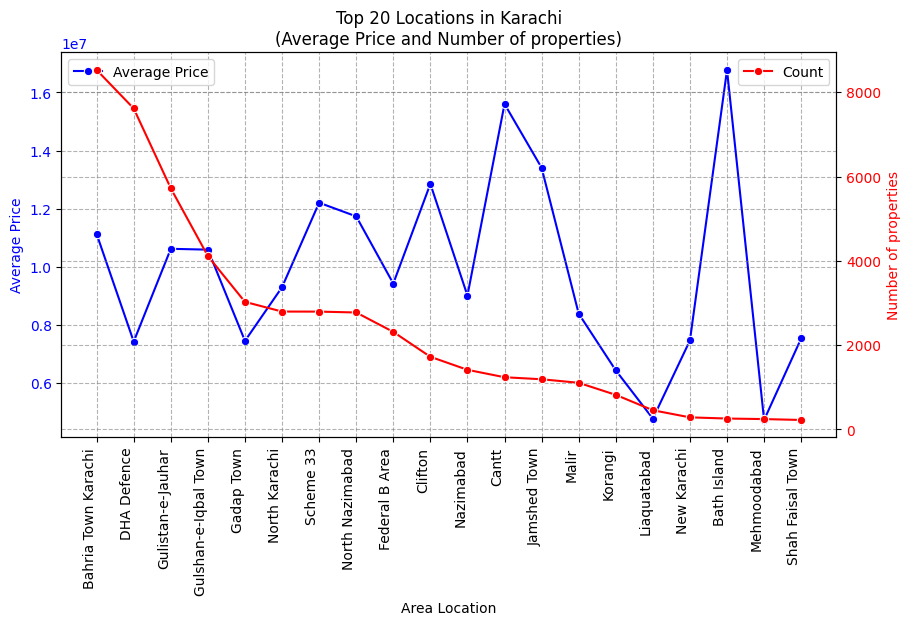

In [24]:
# Filter rows where city is 'Karachi'
karachi_df = df[df['city'] == 'Karachi']

# Count the occurrences of each location
location_counts = karachi_df['location'].value_counts()

# Calculate the average price for each location
location_avg_price = karachi_df.groupby('location')['price'].mean()

# Merge counts and average prices
location_summary = pd.DataFrame({
    'count': location_counts,
    'average_price': location_avg_price
}).reset_index()
location_summary.columns = ['location', 'count', 'average_price']

# Sort by counts to arrange the locations on the x-axis
location_summary_sorted = location_summary.sort_values(by='count', ascending=False).head(20)

# Plot
fig, ax1 = plt.subplots(figsize=(10, 5))  # Set figure size here

# Line plot for average price
sns.lineplot(x='location', y='average_price', data=location_summary_sorted, ax=ax1, color='b', marker='o', label='Average Price')
ax1.set_xlabel('Area Location')
ax1.set_ylabel('Average Price', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for counts
ax2 = ax1.twinx()
sns.lineplot(x='location', y='count', data=location_summary_sorted, ax=ax2, color='r', marker='o', label='Count')
ax2.set_ylabel('Number of properties', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Rotate x-axis labels
ax1.set_xticks(location_summary_sorted['location'])  # Ensure all locations are shown
ax1.set_xticklabels(location_summary_sorted['location'], rotation=90, ha='right')

# Set title
plt.title('Top 20 Locations in Karachi\n(Average Price and Number of properties)')

# Add light-colored gridlines
ax1.grid(True, linestyle='--', color='gray', alpha=0.6)
ax2.grid(True, linestyle='--', color='gray', alpha=0.6)

# Show plot
plt.show()


### Top 20 Locations in Lahore

This bar plot displays the top 20 locations in Lahore based on the number of properties listed.

- **X-Axis**: Represents the top 20 area locations in Lahore.
- **Y-Axis**: Shows the number of properties available in each location.

The x-axis labels are rotated vertically to enhance readability, and gridlines are added to the y-axis to aid in comparison. This visualization provides insights into which locations in Lahore have the highest property counts.


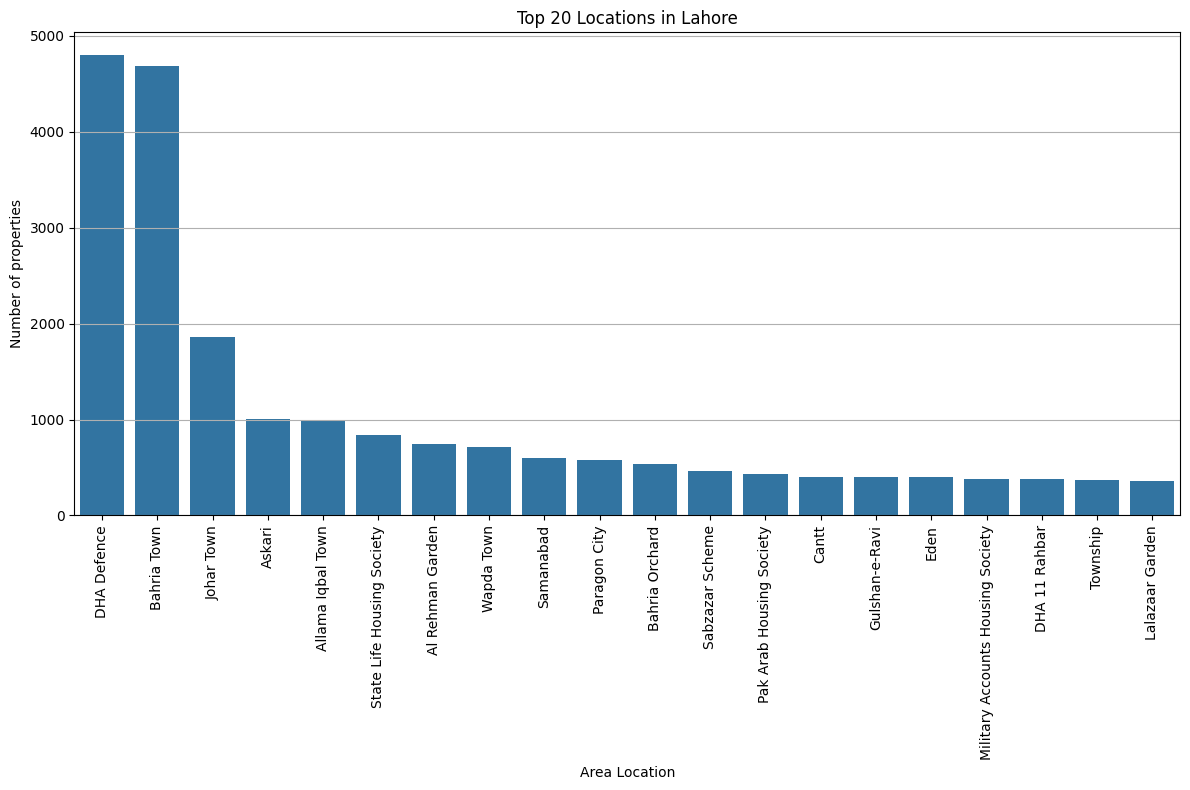

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter rows where city is 'Lahore'
lahore_df = df[df['city'] == 'Lahore']

# Count the occurrences of each location
location_counts = lahore_df['location'].value_counts()

# Get the top 20 locations
top_20_locations = location_counts.head(20)  # Changed to 20 for top 20 locations

# Create a DataFrame from the series for plotting
top_20_locations_df = top_20_locations.reset_index()
top_20_locations_df.columns = ['location', 'count']

# Plot
plt.figure(figsize=(12, 8))  # Increased figure size for better readability
sns.barplot(x='location', y='count', data=top_20_locations_df)
plt.xticks(rotation=90)
plt.title('Top 20 Locations in Lahore')
plt.xlabel('Area Location')
plt.ylabel('Number of properties')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### Top 20 Locations in Lahore

This plot provides insights into the top 20 locations in Lahore based on the number of properties available.

- **X-Axis**: Represents the top 20 area locations in Lahore.
- **Y-Axis (Left)**: Shows the average price of properties in each location (blue line).
- **Y-Axis (Right)**: Displays the number of properties in each location (red line).

The dual y-axes allow us to visualize both the average price and the number of properties for each location. The plot includes:
- A line plot showing the average price for each location, with labels in blue.
- A line plot showing the number of properties available, with labels in red.

The x-axis labels are rotated for better readability, and gridlines are added for enhanced clarity. This visualization helps in understanding the distribution and pricing trends across different locations in Lahore.


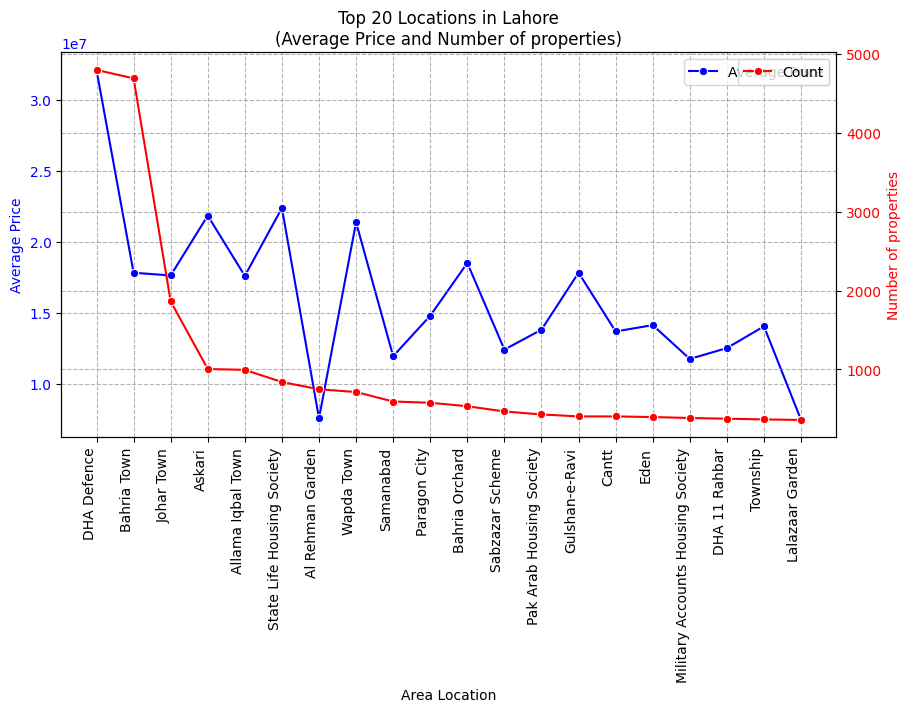

In [26]:
# Filter rows where city is 'Lahore'
lahore_df = df[df['city'] == 'Lahore']

# Count the occurrences of each location
location_counts = lahore_df['location'].value_counts()

# Calculate the average price for each location
location_avg_price = lahore_df.groupby('location')['price'].mean()

# Merge counts and average prices
location_summary = pd.DataFrame({
    'count': location_counts,
    'average_price': location_avg_price
}).reset_index()
location_summary.columns = ['location', 'count', 'average_price']

# Sort by counts to arrange the locations on the x-axis
location_summary_sorted = location_summary.sort_values(by='count', ascending=False).head(20)

# Plot
fig, ax1 = plt.subplots(figsize=(10, 5))  # Set figure size here

# Line plot for average price
sns.lineplot(x='location', y='average_price', data=location_summary_sorted, ax=ax1, color='b', marker='o', label='Average Price')
ax1.set_xlabel('Area Location')
ax1.set_ylabel('Average Price', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for counts
ax2 = ax1.twinx()
sns.lineplot(x='location', y='count', data=location_summary_sorted, ax=ax2, color='r', marker='o', label='Count')
ax2.set_ylabel('Number of properties', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Rotate x-axis labels
ax1.set_xticks(location_summary_sorted['location'])  # Ensure all locations are shown
ax1.set_xticklabels(location_summary_sorted['location'], rotation=90, ha='right')

# Set title
plt.title('Top 20 Locations in Lahore\n(Average Price and Number of properties)')

# Add light-colored gridlines
ax1.grid(True, linestyle='--', color='gray', alpha=0.6)
ax2.grid(True, linestyle='--', color='gray', alpha=0.6)

# Show plot
plt.show()


### Top 20 Locations in Faislabad

This bar plot displays the top 20 locations in Faislabad based on the number of properties listed.

- **X-Axis**: Represents the top 20 area locations in Faislabad.
- **Y-Axis**: Shows the number of properties available in each location.

The x-axis labels are rotated vertically to enhance readability, and gridlines are added to the y-axis to aid in comparison. This visualization provides insights into which locations in Faislabad have the highest property counts.


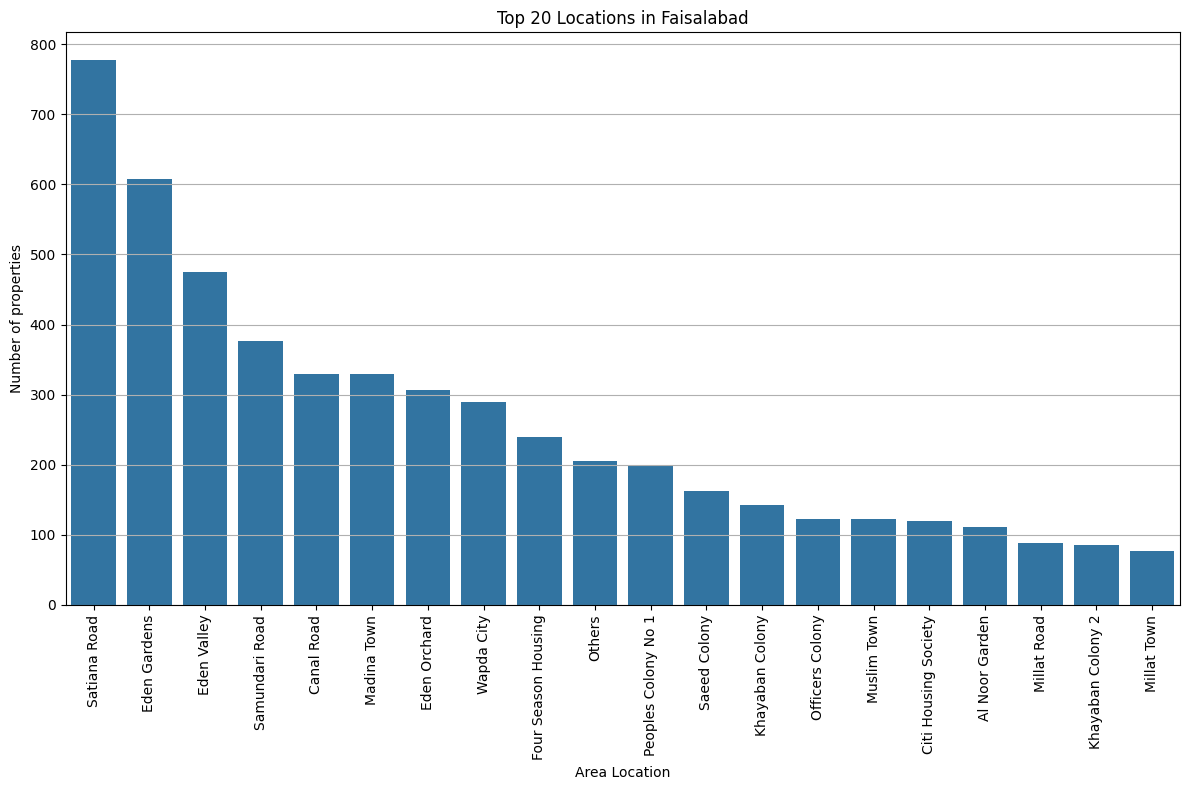

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter rows where city is 'Faisalabad'
faisalabad_df = df[df['city'] == 'Faisalabad']

# Count the occurrences of each location
location_counts = faisalabad_df['location'].value_counts()

# Get the top 20 locations
top_20_locations = location_counts.head(20)  # Changed to 20 for top 20 locations

# Create a DataFrame from the series for plotting
top_20_locations_df = top_20_locations.reset_index()
top_20_locations_df.columns = ['location', 'count']

# Plot
plt.figure(figsize=(12, 8))  # Increased figure size for better readability
sns.barplot(x='location', y='count', data=top_20_locations_df)
plt.xticks(rotation=90)
plt.title('Top 20 Locations in Faisalabad')
plt.xlabel('Area Location')
plt.ylabel('Number of properties')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### Top 20 Locations in Faisalabad

This plot provides insights into the top 20 locations in Faisalabad based on the number of properties available.

- **X-Axis**: Represents the top 20 area locations in Faisalabad.
- **Y-Axis (Left)**: Shows the average price of properties in each location (blue line).
- **Y-Axis (Right)**: Displays the number of properties in each location (red line).

The dual y-axes allow us to visualize both the average price and the number of properties for each location. The plot includes:
- A line plot showing the average price for each location, with labels in blue.
- A line plot showing the number of properties available, with labels in red.

The x-axis labels are rotated for better readability, and gridlines are added for enhanced clarity. This visualization helps in understanding the distribution and pricing trends across different locations in Faisalabad.


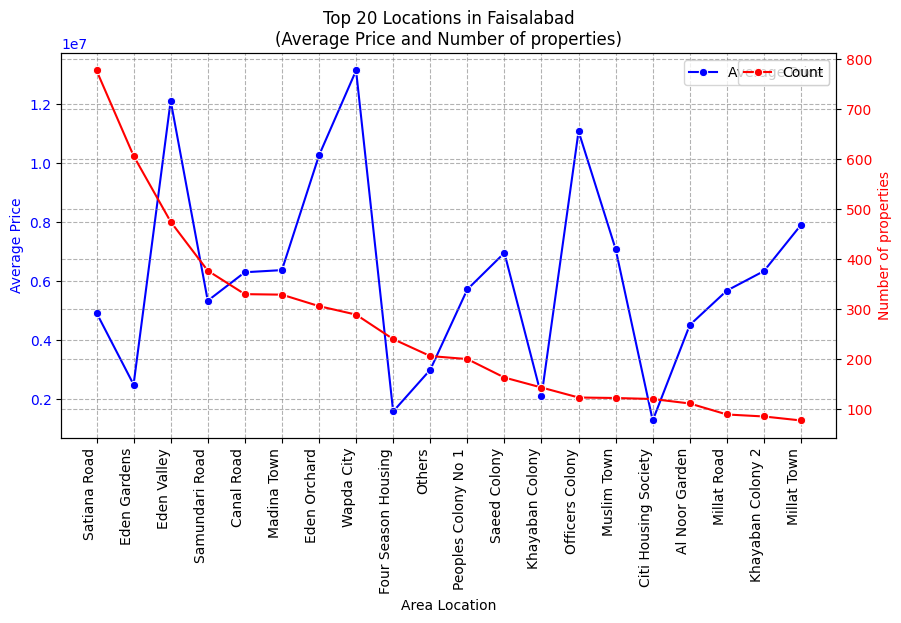

In [28]:
# Filter rows where city is 'Faisalabad'
faisalabad_df = df[df['city'] == 'Faisalabad']

# Count the occurrences of each location
location_counts = faisalabad_df['location'].value_counts()

# Calculate the average price for each location
location_avg_price = faisalabad_df.groupby('location')['price'].mean()

# Merge counts and average prices
location_summary = pd.DataFrame({
    'count': location_counts,
    'average_price': location_avg_price
}).reset_index()
location_summary.columns = ['location', 'count', 'average_price']

# Sort by counts to arrange the locations on the x-axis
location_summary_sorted = location_summary.sort_values(by='count', ascending=False).head(20)

# Plot
fig, ax1 = plt.subplots(figsize=(10, 5))  # Set figure size here

# Line plot for average price
sns.lineplot(x='location', y='average_price', data=location_summary_sorted, ax=ax1, color='b', marker='o', label='Average Price')
ax1.set_xlabel('Area Location')
ax1.set_ylabel('Average Price', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for counts
ax2 = ax1.twinx()
sns.lineplot(x='location', y='count', data=location_summary_sorted, ax=ax2, color='r', marker='o', label='Count')
ax2.set_ylabel('Number of properties', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Rotate x-axis labels
ax1.set_xticks(location_summary_sorted['location'])  # Ensure all locations are shown
ax1.set_xticklabels(location_summary_sorted['location'], rotation=90, ha='right')

# Set title
plt.title('Top 20 Locations in Faisalabad\n(Average Price and Number of properties)')

# Add light-colored gridlines
ax1.grid(True, linestyle='--', color='gray', alpha=0.6)
ax2.grid(True, linestyle='--', color='gray', alpha=0.6)

# Show plot
plt.show()


### Top 20 Locations in Rawalpindi

This bar plot displays the top 20 locations in Rawalpindi based on the number of properties listed.

- **X-Axis**: Represents the top 20 area locations in Rawalpindi.
- **Y-Axis**: Shows the number of properties available in each location.

The x-axis labels are rotated vertically to enhance readability, and gridlines are added to the y-axis to aid in comparison. This visualization provides insights into which locations in Rawalpindi have the highest property counts.


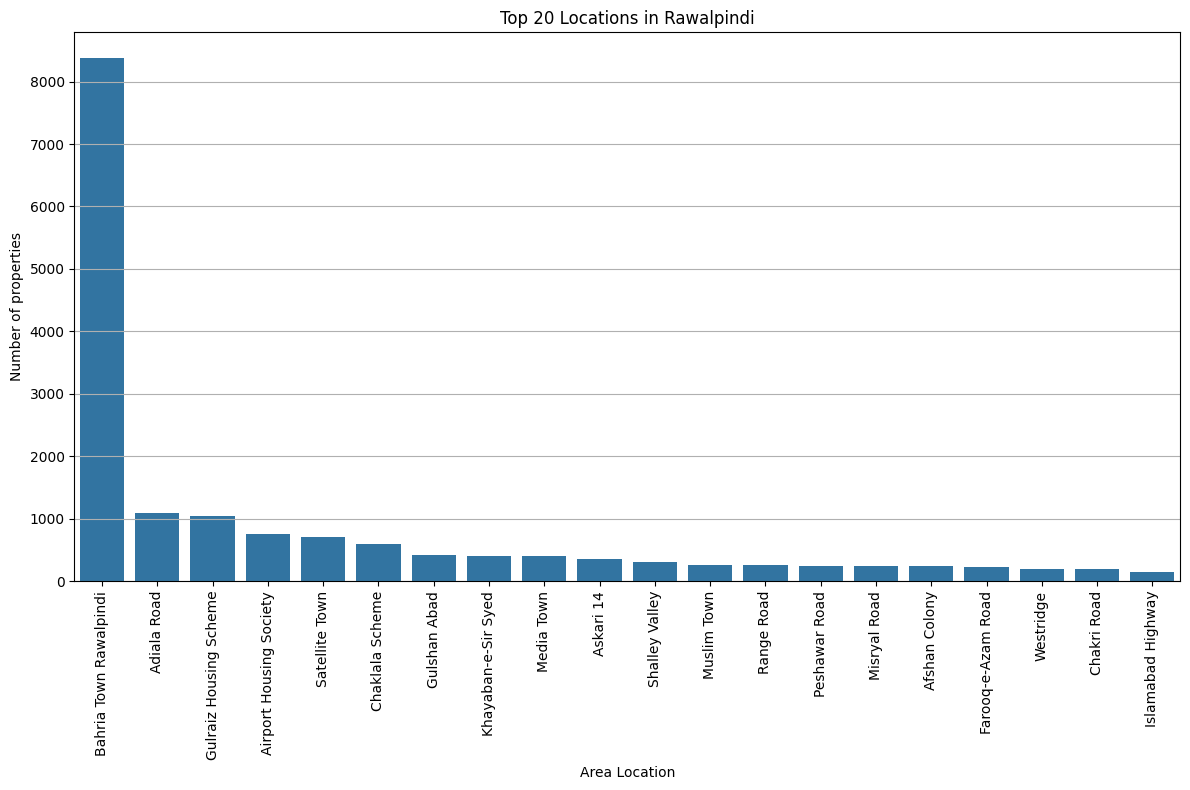

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter rows where city is 'Rawalpindi'
rawalpindi_df = df[df['city'] == 'Rawalpindi']

# Count the occurrences of each location
location_counts = rawalpindi_df['location'].value_counts()

# Get the top 20 locations
top_20_locations = location_counts.head(20)  # Changed to 20 for top 20 locations

# Create a DataFrame from the series for plotting
top_20_locations_df = top_20_locations.reset_index()
top_20_locations_df.columns = ['location', 'count']

# Plot
plt.figure(figsize=(12, 8))  # Increased figure size for better readability
sns.barplot(x='location', y='count', data=top_20_locations_df)
plt.xticks(rotation=90)
plt.title('Top 20 Locations in Rawalpindi')
plt.xlabel('Area Location')
plt.ylabel('Number of properties')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### Top 20 Locations in Rawalpindi

This plot provides insights into the top 20 locations in Rawalpindi based on the number of properties available.

- **X-Axis**: Represents the top 20 area locations in Rawalpindi.
- **Y-Axis (Left)**: Shows the average price of properties in each location (blue line).
- **Y-Axis (Right)**: Displays the number of properties in each location (red line).

The dual y-axes allow us to visualize both the average price and the number of properties for each location. The plot includes:
- A line plot showing the average price for each location, with labels in blue.
- A line plot showing the number of properties available, with labels in red.

The x-axis labels are rotated for better readability, and gridlines are added for enhanced clarity. This visualization helps in understanding the distribution and pricing trends across different locations in Rawalpindi.


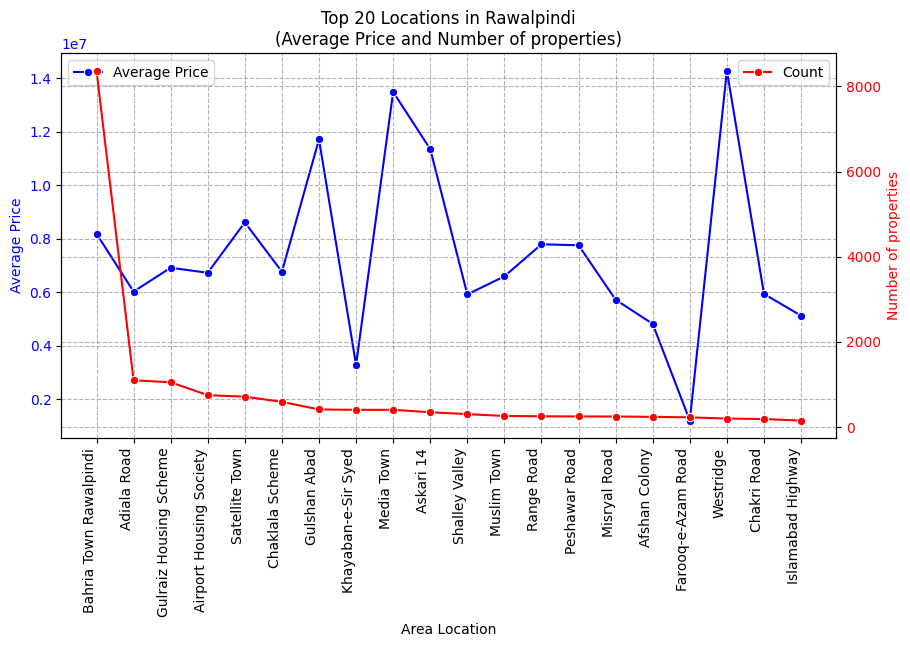

In [30]:
# Filter rows where city is 'Rawalpindi'
rawalpindi_df = df[df['city'] == 'Rawalpindi']

# Count the occurrences of each location
location_counts = rawalpindi_df['location'].value_counts()

# Calculate the average price for each location
location_avg_price = rawalpindi_df.groupby('location')['price'].mean()

# Merge counts and average prices
location_summary = pd.DataFrame({
    'count': location_counts,
    'average_price': location_avg_price
}).reset_index()
location_summary.columns = ['location', 'count', 'average_price']

# Sort by counts to arrange the locations on the x-axis
location_summary_sorted = location_summary.sort_values(by='count', ascending=False).head(20)

# Plot
fig, ax1 = plt.subplots(figsize=(10, 5))  # Set figure size here

# Line plot for average price
sns.lineplot(x='location', y='average_price', data=location_summary_sorted, ax=ax1, color='b', marker='o', label='Average Price')
ax1.set_xlabel('Area Location')
ax1.set_ylabel('Average Price', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for counts
ax2 = ax1.twinx()
sns.lineplot(x='location', y='count', data=location_summary_sorted, ax=ax2, color='r', marker='o', label='Count')
ax2.set_ylabel('Number of properties', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Rotate x-axis labels
ax1.set_xticks(location_summary_sorted['location'])  # Ensure all locations are shown
ax1.set_xticklabels(location_summary_sorted['location'], rotation=90, ha='right')

# Set title
plt.title('Top 20 Locations in Rawalpindi\n(Average Price and Number of properties)')

# Add light-colored gridlines
ax1.grid(True, linestyle='--', color='gray', alpha=0.6)
ax2.grid(True, linestyle='--', color='gray', alpha=0.6)

# Show plot
plt.show()


In [31]:
df

,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,Area Type,Area Size,Area Category,year_month
0,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4.0 Marla,For Sale,2,2019-02-04,Marla,4.0,0-5 Marla,2019-02
1,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,2019-05-04,Marla,5.6,5-10 Marla,2019-05
2,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8.0 Marla,For Sale,5,2019-07-17,Marla,8.0,5-10 Marla,2019-07
3,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,40.0 Marla,For Sale,4,2019-04-05,Marla,40.0,1-5 Kanal,2019-04
4,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8.0 Marla,For Sale,3,2019-07-10,Marla,8.0,5-10 Marla,2019-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168441,House,26500000,Gadap Town,Karachi,Sindh,25.029909,67.137192,0,9.6 Marla,For Sale,6,2019-07-18,Marla,9.6,5-10 Marla,2019-07
168442,House,12500000,Gadap Town,Karachi,Sindh,25.017951,67.136393,0,8.0 Marla,For Sale,3,2019-07-18,Marla,8.0,5-10 Marla,2019-07
168443,House,27000000,Gadap Town,Karachi,Sindh,25.015384,67.116330,0,9.6 Marla,For Sale,6,2019-07-18,Marla,9.6,5-10 Marla,2019-07
168444,House,11000000,Gadap Town,Karachi,Sindh,25.013265,67.120818,0,7.8 Marla,For Sale,3,2019-07-18,Marla,7.8,5-10 Marla,2019-07


### Data Cleaning: Removing Unnecessary Columns

In this step, we clean the dataset by removing columns that are not needed for our analysis and prediction tasks.

1. **Columns to Remove**: The following columns are removed:
   - `property_type`
   - `location`
   - `latitude`
   - `longitude`
   - `area`
   - `purpose`
   - `Area Type`
   - `Area Category`
   - `year_month`
   - `province_name`

2. **Reason for Removal**: These columns are excluded because they are either not relevant for the analysis or do not provide additional value for the prediction models. The remaining dataset will focus on the essential features needed for house price analysis and prediction.

**Next Steps:**
- Review the cleaned dataset to ensure that all necessary columns for analysis are retained.
- Proceed with further data preprocessing or feature engineering as required for the model.

This step helps in simplifying the dataset, which can lead to more efficient and effective modeling.


In [32]:
# Define the list of columns to be removed from the DataFrame
columns_to_remove = [
    'property_type', 'location', 'latitude', 'longitude',
    'area', 'purpose', 'Area Type', 'Area Category', 'year_month', 'province_name'
]

# Drop the specified columns from the DataFrame to clean the data
df_cleaned = df.drop(columns=columns_to_remove)


### Displaying the Cleaned DataFrame

Here we display the first few rows of the cleaned DataFrame (`df_cleaned`) to verify that the unnecessary columns have been successfully removed.

This cleaned DataFrame will be used for subsequent analysis and modeling, focusing on the essential features retained after the column removal step.


In [33]:
df_cleaned

,price,city,baths,bedrooms,date_added,Area Size
0,10000000,Islamabad,2,2,2019-02-04,4.0
1,6900000,Islamabad,3,3,2019-05-04,5.6
2,16500000,Islamabad,6,5,2019-07-17,8.0
3,43500000,Islamabad,4,4,2019-04-05,40.0
4,7000000,Islamabad,3,3,2019-07-10,8.0
...,...,...,...,...,...,...
168441,26500000,Karachi,0,6,2019-07-18,9.6
168442,12500000,Karachi,0,3,2019-07-18,8.0
168443,27000000,Karachi,0,6,2019-07-18,9.6
168444,11000000,Karachi,0,3,2019-07-18,7.8


### Daily Total Sales Analysis

In this section, we analyze the daily total sales data. We have calculated various statistical metrics to understand the distribution and trend of sales over time.

**Statistics:**
- **Mean Total Sales**: The average sales value across the period.
- **Median Total Sales**: The midpoint value of sales, which is less affected by extreme values.
- **Minimum Total Sales**: The lowest recorded sales value.
- **Maximum Total Sales**: The highest recorded sales value.
- **Standard Deviation**: A measure of the variability in sales.

**Trend Analysis:**
We identified the trend in sales using the difference between consecutive days' sales values:
- **Increasing**: Sales are generally rising over time.
- **Decreasing**: Sales are generally falling over time.
- **Stable**: Sales are relatively constant over time.

**Significant Peaks and Troughs:**
- **Peaks**: The dates with the highest sales values.
- **Troughs**: The dates with the lowest sales values.

The plot below illustrates the total sales over time, with markers indicating daily sales values. This visualization helps in understanding how sales have evolved over the analyzed period.


In [34]:
# Aggregate the data by date
daily_sales_df = df_cleaned.groupby('date_added').agg({'price': 'sum'}).reset_index()
daily_sales_df.columns = ['date', 'total_sales']



Daily Total Sales Analysis:

- Mean Total Sales: 13042361941.11
- Median Total Sales: 6252850750.00
- Minimum Total Sales: 3010300.00
- Maximum Total Sales: 96818037500.00
- Standard Deviation: 18114432858.13

Trend: The total sales are generally increasing over time.

Significant Peaks:
- The highest sales were recorded on 2019-07-03 00:00:00.

Significant Troughs:
- The lowest sales were recorded on 2018-12-10 00:00:00.



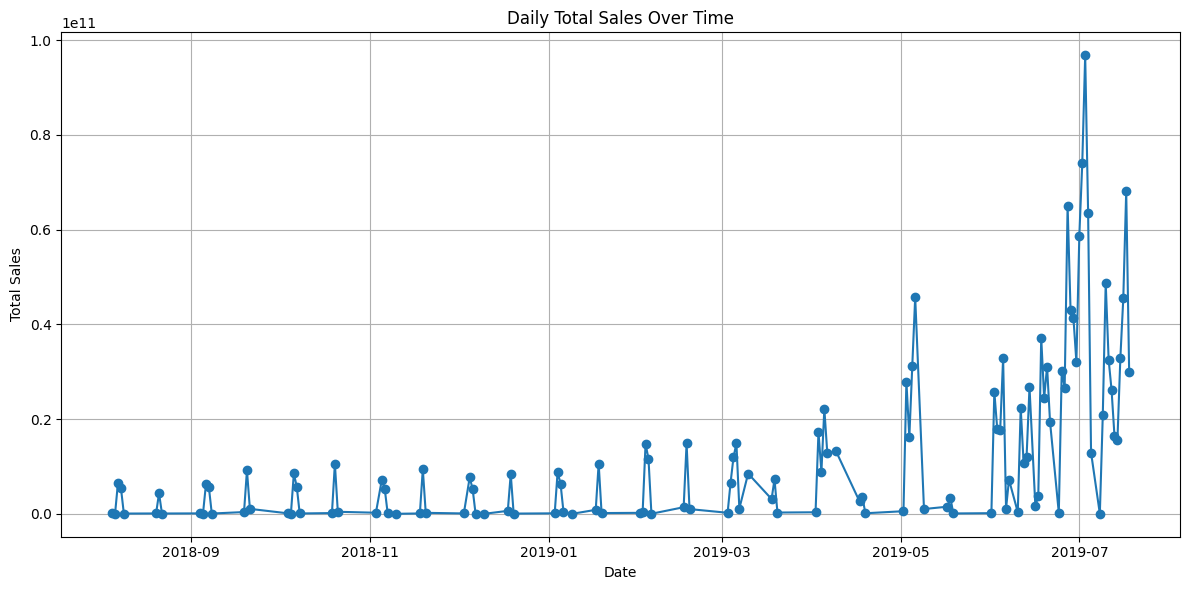

In [35]:
# Calculate statistics for textual analysis
total_sales_mean = daily_sales_df['total_sales'].mean()
total_sales_median = daily_sales_df['total_sales'].median()
total_sales_min = daily_sales_df['total_sales'].min()
total_sales_max = daily_sales_df['total_sales'].max()
total_sales_std = daily_sales_df['total_sales'].std()

# Identify trends (simplified approach)
sales_diff = daily_sales_df['total_sales'].diff()
trend = 'increasing' if sales_diff.mean() > 0 else 'decreasing' if sales_diff.mean() < 0 else 'stable'

# Identify significant peaks and troughs
peak_dates = daily_sales_df[daily_sales_df['total_sales'] == total_sales_max]['date'].tolist()
trough_dates = daily_sales_df[daily_sales_df['total_sales'] == total_sales_min]['date'].tolist()

# Generate textual summary
summary = f"""
Daily Total Sales Analysis:

- Mean Total Sales: {total_sales_mean:.2f}
- Median Total Sales: {total_sales_median:.2f}
- Minimum Total Sales: {total_sales_min:.2f}
- Maximum Total Sales: {total_sales_max:.2f}
- Standard Deviation: {total_sales_std:.2f}

Trend: The total sales are generally {trend} over time.

Significant Peaks:
- The highest sales were recorded on {', '.join(str(date) for date in peak_dates)}.

Significant Troughs:
- The lowest sales were recorded on {', '.join(str(date) for date in trough_dates)}.
"""

print(summary)

# Plotting the total sales over time
plt.figure(figsize=(12, 6))
plt.plot(daily_sales_df['date'], daily_sales_df['total_sales'], marker='o', linestyle='-')
plt.title('Daily Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [36]:
df_cleaned.describe()

,price,baths,bedrooms,date_added,Area Size
count,1.548990e+05,154899.000000,154899.000000,154899,154899.000000
mean,1.044069e+07,2.731315,3.022518,2019-05-21 19:08:55.820114944,10.036109
min,0.000000e+00,0.000000,0.000000,2018-08-05 00:00:00,0.000000
25%,1.150000e+05,0.000000,2.000000,2019-05-05 00:00:00,4.800000
50%,7.200000e+06,3.000000,3.000000,2019-06-27 00:00:00,6.700000
75%,1.550000e+07,4.000000,4.000000,2019-07-08 00:00:00,10.000000
max,4.820000e+07,403.000000,68.000000,2019-07-18 00:00:00,16000.000000
std,1.141954e+07,2.371854,1.863046,NaN,85.409044


In [37]:
# Display the first row of the cleaned DataFrame
df_cleaned.head(1)

,price,city,baths,bedrooms,date_added,Area Size
0,10000000,Islamabad,2,2,2019-02-04,4.0


In [38]:
# Print the column names of the cleaned DataFrame
print(df_cleaned.columns)

Index(['price', 'city', 'baths', 'bedrooms', 'date_added', 'Area Size'], dtype='object')


### Building the ConvLSTM Model
A ConvLSTM model is built with Conv1D, MaxPooling1D, and LSTM layers. Batch normalization and dropout are used to enhance model performance and prevent overfitting.

### Training the Model
The model is trained with early stopping to monitor validation loss and prevent overfitting. Training and validation loss are plotted to assess model performance over epochs.

### Making Predictions
The model's performance is evaluated by predicting prices on the test set. Actual vs. predicted prices are plotted to visualize model accuracy.

### Future Predictions
The model is used to make predictions for the next 60 days. Historical and future price predictions are plotted to provide insights into future trends.

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# Assuming df_cleaned is already defined with appropriate columns
# Convert 'date_added' to datetime
df_cleaned['date_added'] = pd.to_datetime(df_cleaned['date_added'])

# Create a new dataframe with only 'date_added' and 'price'
df_price_date = df_cleaned[['date_added', 'price']]

# Aggregate daily prices
daily_price_df = df_price_date.groupby(df_price_date['date_added'].dt.date).agg({
    'price': 'sum'
}).reset_index()

# Rename columns for clarity
daily_price_df.columns = ['date', 'total_price']

# Ensure the date column is a datetime type
daily_price_df['date'] = pd.to_datetime(daily_price_df['date'])

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(daily_price_df[['total_price']])

# Preparing the data for ConvLSTM
def create_sequences(data, seq_length):
    xs, ys, dates = [], [], []
    for i in range(len(data) - seq_length):
        x = data[i:i + seq_length]
        y = data[i + seq_length][0]  # Predicting 'total_price'
        xs.append(x)
        ys.append(y)
        dates.append(daily_price_df['date'][i + seq_length])
    return np.array(xs), np.array(ys), dates

SEQ_LENGTH = 30
X, y, dates = create_sequences(scaled_data, SEQ_LENGTH)

# Reshape input data for Conv1D layer
X = X.reshape((X.shape[0], X.shape[1], X.shape[2]))

# Splitting the data into train and test sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]
dates_train, dates_test = dates[:split], dates[split:]

# Building a ConvLSTM model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same', input_shape=(SEQ_LENGTH, 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(50))
model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Implementing Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training the model
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2)

# Making predictions
predictions = model.predict(X_test)

# Reverse standardization of predictions
y_test_actual = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 0))), axis=1))[:, 0]
predictions_actual = scaler.inverse_transform(np.concatenate((predictions, np.zeros((predictions.shape[0], 0))), axis=1))[:, 0]

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(dates_test, y_test_actual, color='blue', label='Actual Prices')
plt.plot(dates_test, predictions_actual, color='red', label='Predicted Prices')
plt.title('Actual vs Predicted Total Prices')
plt.xlabel('Date')
plt.ylabel('Total Prices')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the training loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Making future predictions for 30 days
def make_future_predictions(model, data, seq_length, steps):
    future_predictions = []
    current_data = data[-seq_length:]

    for _ in range(steps):
        current_data = current_data.reshape((1, seq_length, data.shape[1]))
        next_prediction = model.predict(current_data)[0, 0]
        future_predictions.append(next_prediction)

        # Create the next data point
        next_data = np.concatenate((current_data[:, 1:, :], np.array([[[next_prediction]]])), axis=1)
        current_data = next_data

    return np.array(future_predictions)

future_steps = 60
future_predictions_scaled = make_future_predictions(model, scaled_data, SEQ_LENGTH, future_steps)

# Reverse scaling future predictions
future_predictions_actual = scaler.inverse_transform(np.concatenate((future_predictions_scaled.reshape(-1, 1), np.zeros((future_predictions_scaled.shape[0], 0))), axis=1))[:, 0]

# Creating dates for future predictions
last_date = daily_price_df['date'].iloc[-1]
future_dates = pd.date_range(last_date, periods=future_steps + 1, inclusive='right')[1:]


# Check the length of future_dates and future_predictions_actual
print(len(future_dates))
print(len(future_predictions_actual))

# If there's a mismatch, correct it. For future_dates, it should be one less than future_predictions_actual
if len(future_dates) != len(future_predictions_actual):
    # Adjust future_dates to match the length of future_predictions_actual
    future_dates = pd.date_range(start=last_date, periods=future_steps, freq='D')

# Plotting future predictions
plt.figure(figsize=(12, 6))
plt.plot(daily_price_df['date'], daily_price_df['total_price'], marker='o', linestyle='-', color='blue', label='Historical Prices')
plt.plot(future_dates, future_predictions_actual, marker='o', linestyle='-', color='green', label='Future Predictions')
plt.title('Historical and Future Total Price Predictions')
plt.xlabel('Date')
plt.ylabel('Total Prices')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


ModuleNotFoundError: No module named 'sklearn'

### Model Building using LSTM:

Created an LSTM model with two LSTM layers and Dropout layers.
Compiled and trained the model with 200 epochs.
Prediction and Visualization:

Made predictions on the test set and reversed the standardization.
Plotted actual vs predicted prices and training/validation loss.
Implemented future price predictions for 60 days and visualized them.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Assuming df_cleaned is already defined with appropriate columns
# Convert 'date_added' to datetime
df_cleaned['date_added'] = pd.to_datetime(df_cleaned['date_added'])

# Create a new dataframe with only 'date_added' and 'price'
df_price_date = df_cleaned[['date_added', 'price']]

# Aggregate daily prices
daily_price_df = df_price_date.groupby(df_price_date['date_added'].dt.date).agg({
    'price': 'sum'
}).reset_index()

# Rename columns for clarity
daily_price_df.columns = ['date', 'total_price']

# Ensure the date column is a datetime type
daily_price_df['date'] = pd.to_datetime(daily_price_df['date'])

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(daily_price_df[['total_price']])

# Preparing the data for LSTM
def create_sequences(data, seq_length):
    xs, ys, dates = [], [], []
    for i in range(len(data) - seq_length):
        x = data[i:i + seq_length]
        y = data[i + seq_length][0]  # Predicting 'total_price'
        xs.append(x)
        ys.append(y)
        dates.append(daily_price_df['date'][i + seq_length])
    return np.array(xs), np.array(ys), dates

SEQ_LENGTH = 30
X, y, dates = create_sequences(scaled_data, SEQ_LENGTH)

# Reshape input data for LSTM layer
X = X.reshape((X.shape[0], X.shape[1], 1))

# Splitting the data into train and test sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]
dates_train, dates_test = dates[:split], dates[split:]

# Building an LSTM model
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(SEQ_LENGTH, 1)))
model.add(Dropout(0.3))
model.add(LSTM(50))
model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Training the model
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2)

# Making predictions
predictions = model.predict(X_test)

# Reverse standardization of predictions
y_test_actual = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 0))), axis=1))[:, 0]
predictions_actual = scaler.inverse_transform(np.concatenate((predictions, np.zeros((predictions.shape[0], 0))), axis=1))[:, 0]

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(dates_test, y_test_actual, color='blue', label='Actual Prices')
plt.plot(dates_test, predictions_actual, color='red', label='Predicted Prices')
plt.title('Actual vs Predicted Total Prices')
plt.xlabel('Date')
plt.ylabel('Total Prices')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the training loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Making future predictions for 30 days
def make_future_predictions(model, data, seq_length, steps):
    future_predictions = []
    current_data = data[-seq_length:]

    for _ in range(steps):
        current_data = current_data.reshape((1, seq_length, 1))
        next_prediction = model.predict(current_data)[0, 0]
        future_predictions.append(next_prediction)

        # Create the next data point
        next_data = np.concatenate((current_data[:, 1:, :], np.array([[[next_prediction]]])), axis=1)
        current_data = next_data

    return np.array(future_predictions)

future_steps = 60
future_predictions_scaled = make_future_predictions(model, scaled_data, SEQ_LENGTH, future_steps)

# Reverse scaling future predictions
future_predictions_actual = scaler.inverse_transform(np.concatenate((future_predictions_scaled.reshape(-1, 1), np.zeros((future_predictions_scaled.shape[0], 0))), axis=1))[:, 0]

# Creating dates for future predictions
last_date = daily_price_df['date'].iloc[-1]
future_dates = pd.date_range(last_date, periods=future_steps + 1, inclusive='right')[1:]

# Check the length of future_dates and future_predictions_actual
print(len(future_dates))
print(len(future_predictions_actual))

# If there's a mismatch, correct it. For future_dates, it should be one less than future_predictions_actual
if len(future_dates) != len(future_predictions_actual):
    # Adjust future_dates to match the length of future_predictions_actual
    future_dates = pd.date_range(start=last_date, periods=future_steps, freq='D')

# Plotting future predictions
plt.figure(figsize=(12, 6))
plt.plot(daily_price_df['date'], daily_price_df['total_price'], marker='o', linestyle='-', color='blue', label='Historical Prices')
plt.plot(future_dates, future_predictions_actual, marker='o', linestyle='-', color='green', label='Future Predictions')
plt.title('Historical and Future Total Price Predictions')
plt.xlabel('Date')
plt.ylabel('Total Prices')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Model Building using ConvLSTM:

Constructed a ConvLSTM model with Conv1D and LSTM layers, along with BatchNormalization and Dropout.
Implemented early stopping to prevent overfitting.
Training and Prediction:

Trained the model and plotted the training/validation loss.
Made predictions on the test set and future predictions for 60 days.
Plotted actual vs. predicted prices and future predictions.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# Assuming df_cleaned is already defined with appropriate columns
# Convert 'date_added' to datetime
df_cleaned['date_added'] = pd.to_datetime(df_cleaned['date_added'])

# Create a new dataframe with only 'date_added' and 'price'
df_price_date = df_cleaned[['date_added', 'price']]

# Aggregate daily prices
daily_price_df = df_price_date.groupby(df_price_date['date_added'].dt.date).agg({
    'price': 'sum'
}).reset_index()

# Rename columns for clarity
daily_price_df.columns = ['date', 'total_price']

# Ensure the date column is a datetime type
daily_price_df['date'] = pd.to_datetime(daily_price_df['date'])

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(daily_price_df[['total_price']])

# Preparing the data for ConvLSTM
def create_sequences(data, seq_length):
    xs, ys, dates = [], [], []
    for i in range(len(data) - seq_length):
        x = data[i:i + seq_length]
        y = data[i + seq_length][0]  # Predicting 'total_price'
        xs.append(x)
        ys.append(y)
        dates.append(daily_price_df['date'][i + seq_length])
    return np.array(xs), np.array(ys), dates

SEQ_LENGTH = 30
X, y, dates = create_sequences(scaled_data, SEQ_LENGTH)

# Reshape input data for Conv1D layer
X = X.reshape((X.shape[0], X.shape[1], X.shape[2]))

# Splitting the data into train and test sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]
dates_train, dates_test = dates[:split], dates[split:]

# Building a ConvLSTM model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same', input_shape=(SEQ_LENGTH, 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(50))
model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Implementing Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training the model
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2)

# Making predictions
predictions = model.predict(X_test)

# Reverse standardization of predictions
y_test_actual = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 0))), axis=1))[:, 0]
predictions_actual = scaler.inverse_transform(np.concatenate((predictions, np.zeros((predictions.shape[0], 0))), axis=1))[:, 0]

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(dates_test, y_test_actual, color='blue', label='Actual Prices')
plt.plot(dates_test, predictions_actual, color='red', label='Predicted Prices')
plt.title('Actual vs Predicted Total Prices')
plt.xlabel('Date')
plt.ylabel('Total Prices')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the training loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Making future predictions for 30 days
def make_future_predictions(model, data, seq_length, steps):
    future_predictions = []
    current_data = data[-seq_length:]

    for _ in range(steps):
        current_data = current_data.reshape((1, seq_length, data.shape[1]))
        next_prediction = model.predict(current_data)[0, 0]
        future_predictions.append(next_prediction)

        # Create the next data point
        next_data = np.concatenate((current_data[:, 1:, :], np.array([[[next_prediction]]])), axis=1)
        current_data = next_data

    return np.array(future_predictions)

future_steps = 60
future_predictions_scaled = make_future_predictions(model, scaled_data, SEQ_LENGTH, future_steps)

# Reverse scaling future predictions
future_predictions_actual = scaler.inverse_transform(np.concatenate((future_predictions_scaled.reshape(-1, 1), np.zeros((future_predictions_scaled.shape[0], 0))), axis=1))[:, 0]

# Creating dates for future predictions
last_date = daily_price_df['date'].iloc[-1]
future_dates = pd.date_range(last_date, periods=future_steps + 1, inclusive='right')[1:]

# If there's a mismatch, correct it. For future_dates, it should be one less than future_predictions_actual
if len(future_dates) != len(future_predictions_actual):
    # Adjust future_dates to match the length of future_predictions_actual
    future_dates = pd.date_range(start=last_date, periods=future_steps, freq='D')

# Plotting future predictions
plt.figure(figsize=(12, 6))
plt.plot(daily_price_df['date'], daily_price_df['total_price'], marker='o', linestyle='-', color='blue', label='Historical Prices')
plt.plot(future_dates, future_predictions_actual, marker='o', linestyle='-', color='green', label='Future Predictions')
plt.title('Historical and Future Total Price Predictions')
plt.xlabel('Date')
plt.ylabel('Total Prices')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Model Building using LSTM:

**LSTM Layers**: Made a well-defined LSTM architecture with dropout for regularization. Ensure return_sequences=True in the first LSTM layer as it’s necessary for stacking LSTM layers.

**Training and Prediction:**
**Training**: The model is trained with a validation split and early stopping would further improve performance by avoiding overfitting.
Predictions: Predictions are correctly made and reverse standardized to interpret actual values.
Plotting Results:

**Actual vs Predicted Prices:** The plot compares actual vs. predicted prices, which is a good way to visualize model performance.
Training Loss: Plotting loss curves helps in understanding model convergence.
Future Predictions:

**Future Prediction Function:** The make_future_predictions function is correctly implemented for generating future forecasts.
Date Range: future_dates calculation is appropriately handled, and adjusted for length mismatches, which is crucial.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Assuming df_cleaned is already defined with appropriate columns
# Convert 'date_added' to datetime
df_cleaned['date_added'] = pd.to_datetime(df_cleaned['date_added'])

# Create a new dataframe with only 'date_added' and 'price'
df_price_date = df_cleaned[['date_added', 'price']]

# Aggregate daily prices
daily_price_df = df_price_date.groupby(df_price_date['date_added'].dt.date).agg({
    'price': 'sum'
}).reset_index()

# Rename columns for clarity
daily_price_df.columns = ['date', 'total_price']

# Ensure the date column is a datetime type
daily_price_df['date'] = pd.to_datetime(daily_price_df['date'])

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(daily_price_df[['total_price']])

# Preparing the data for LSTM
def create_sequences(data, seq_length):
    xs, ys, dates = [], [], []
    for i in range(len(data) - seq_length):
        x = data[i:i + seq_length]
        y = data[i + seq_length][0]  # Predicting 'total_price'
        xs.append(x)
        ys.append(y)
        dates.append(daily_price_df['date'][i + seq_length])
    return np.array(xs), np.array(ys), dates

SEQ_LENGTH = 30
X, y, dates = create_sequences(scaled_data, SEQ_LENGTH)

# Reshape input data for LSTM layer
X = X.reshape((X.shape[0], X.shape[1], 1))

# Splitting the data into train and test sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]
dates_train, dates_test = dates[:split], dates[split:]

# Building an LSTM model
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(SEQ_LENGTH, 1)))
model.add(Dropout(0.3))
model.add(LSTM(50))
model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Training the model
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2)

# Making predictions
predictions = model.predict(X_test)

# Reverse standardization of predictions
y_test_actual = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 0))), axis=1))[:, 0]
predictions_actual = scaler.inverse_transform(np.concatenate((predictions, np.zeros((predictions.shape[0], 0))), axis=1))[:, 0]

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(dates_test, y_test_actual, color='blue', label='Actual Prices')
plt.plot(dates_test, predictions_actual, color='red', label='Predicted Prices')
plt.title('Actual vs Predicted Total Prices')
plt.xlabel('Date')
plt.ylabel('Total Prices')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the training loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Making future predictions for 30 days
def make_future_predictions(model, data, seq_length, steps):
    future_predictions = []
    current_data = data[-seq_length:]

    for _ in range(steps):
        current_data = current_data.reshape((1, seq_length, 1))
        next_prediction = model.predict(current_data)[0, 0]
        future_predictions.append(next_prediction)

        # Create the next data point
        next_data = np.concatenate((current_data[:, 1:, :], np.array([[[next_prediction]]])), axis=1)
        current_data = next_data

    return np.array(future_predictions)

future_steps = 60
future_predictions_scaled = make_future_predictions(model, scaled_data, SEQ_LENGTH, future_steps)

# Reverse scaling future predictions
future_predictions_actual = scaler.inverse_transform(np.concatenate((future_predictions_scaled.reshape(-1, 1), np.zeros((future_predictions_scaled.shape[0], 0))), axis=1))[:, 0]

# Creating dates for future predictions
last_date = daily_price_df['date'].iloc[-1]
future_dates = pd.date_range(last_date, periods=future_steps + 1, inclusive='right')[1:]

# Check the length of future_dates and future_predictions_actual
print(len(future_dates))
print(len(future_predictions_actual))

# If there's a mismatch, correct it. For future_dates, it should be one less than future_predictions_actual
if len(future_dates) != len(future_predictions_actual):
    # Adjust future_dates to match the length of future_predictions_actual
    future_dates = pd.date_range(start=last_date, periods=future_steps, freq='D')

# Plotting future predictions
plt.figure(figsize=(12, 6))
plt.plot(daily_price_df['date'], daily_price_df['total_price'], marker='o', linestyle='-', color='blue', label='Historical Prices')
plt.plot(future_dates, future_predictions_actual, marker='o', linestyle='-', color='green', label='Future Predictions')
plt.title('Historical and Future Total Price Predictions')
plt.xlabel('Date')
plt.ylabel('Total Prices')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Model Building using GRU



*   Split Data: The data is split into training and testing sets.
*   Build GRU Model: A Sequential GRU model is built with dropout layers for regularization.
* Compile Model: The model is compiled with the Adam optimizer and Mean Squared Error loss function.
* Train Model: The model is trained on the training data over a specified number of epochs with validation.

### Predictions and Evaluation
* Make Predictions: Predictions are made on the test set.
* Plot Results: The actual vs. predicted prices are plotted, along with the training and validation loss over epochs.

###Future Predictions
* Define Future Predictions Function: A function is defined to generate future price predictions based on the trained model.
Generate Future Predictions: Future price predictions are made for a specified number of days.
* Reverse Scaling: Future predictions are reverse-transformed to their original scale, and negative values are set to zero.
* Create Future Dates: Dates for future predictions are created.
* Plot Future Predictions: Historical prices and future predictions are plotted to visualize the forecast.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout

# Assuming df_cleaned is already defined with appropriate columns
# Convert 'date_added' to datetime
df_cleaned['date_added'] = pd.to_datetime(df_cleaned['date_added'])

# Create a new dataframe with only 'date_added' and 'price'
df_price_date = df_cleaned[['date_added', 'price']]

# Aggregate daily prices
daily_price_df = df_price_date.groupby(df_price_date['date_added'].dt.date).agg({
    'price': 'sum'
}).reset_index()

# Rename columns for clarity
daily_price_df.columns = ['date', 'total_price']

# Ensure the date column is a datetime type
daily_price_df['date'] = pd.to_datetime(daily_price_df['date'])

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(daily_price_df[['total_price']])

# Preparing the data for GRU
def create_sequences(data, seq_length):
    xs, ys, dates = [], [], []
    for i in range(len(data) - seq_length):
        x = data[i:i + seq_length]
        y = data[i + seq_length][0]  # Predicting 'total_price'
        xs.append(x)
        ys.append(y)
        dates.append(daily_price_df['date'][i + seq_length])
    return np.array(xs), np.array(ys), dates

SEQ_LENGTH = 60
X, y, dates = create_sequences(scaled_data, SEQ_LENGTH)

# Reshape input data for GRU layer
X = X.reshape((X.shape[0], X.shape[1], 1))

# Splitting the data into train and test sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]
dates_train, dates_test = dates[:split], dates[split:]

# Building a GRU model
model = Sequential()
model.add(GRU(100, return_sequences=True, input_shape=(SEQ_LENGTH, 1)))
model.add(Dropout(0.3))
model.add(GRU(50))
model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Training the model
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2)

# Making predictions
predictions = model.predict(X_test)

# Reverse standardization of predictions
y_test_actual = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 0))), axis=1))[:, 0]
predictions_actual = scaler.inverse_transform(np.concatenate((predictions, np.zeros((predictions.shape[0], 0))), axis=1))[:, 0]

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(dates_test, y_test_actual, color='blue', label='Actual Prices')
plt.plot(dates_test, predictions_actual, color='red', label='Predicted Prices')
plt.title('Actual vs Predicted Total Prices')
plt.xlabel('Date')
plt.ylabel('Total Prices')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the training loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Making future predictions for 30 days
def make_future_predictions(model, data, seq_length, steps):
    future_predictions = []
    current_data = data[-seq_length:]

    for _ in range(steps):
        current_data = current_data.reshape((1, seq_length, 1))
        next_prediction = model.predict(current_data)[0, 0]
        future_predictions.append(next_prediction)

        # Create the next data point
        next_data = np.concatenate((current_data[:, 1:, :], np.array([[[next_prediction]]])), axis=1)
        current_data = next_data

    return np.array(future_predictions)

future_steps = 30
future_predictions_scaled = make_future_predictions(model, scaled_data, SEQ_LENGTH, future_steps)

# Reverse scaling future predictions
future_predictions_actual = scaler.inverse_transform(np.concatenate((future_predictions_scaled.reshape(-1, 1), np.zeros((future_predictions_scaled.shape[0], 0))), axis=1))[:, 0]

# Creating dates for future predictions
last_date = daily_price_df['date'].iloc[-1]
future_dates = pd.date_range(last_date, periods=future_steps + 1, inclusive='right')[1:]

# Check the length of future_dates and future_predictions_actual
print(len(future_dates))
print(len(future_predictions_actual))

# If there's a mismatch, correct it. For future_dates, it should be one less than future_predictions_actual
if len(future_dates) != len(future_predictions_actual):
    # Adjust future_dates to match the length of future_predictions_actual
    future_dates = pd.date_range(start=last_date, periods=future_steps, freq='D')

# Plotting future predictions
plt.figure(figsize=(12, 6))
plt.plot(daily_price_df['date'], daily_price_df['total_price'], marker='o', linestyle='-', color='blue', label='Historical Prices')
plt.plot(future_dates, future_predictions_actual, marker='o', linestyle='-', color='green', label='Future Predictions')
plt.title('Historical and Future Total Price Predictions')
plt.xlabel('Date')
plt.ylabel('Total Prices')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Model Building using GRU



*   Split Data: The data is split into training and testing sets.
*   Build GRU Model: A Sequential GRU model is built with dropout layers for regularization.
* Compile Model: The model is compiled with the Adam optimizer and Mean Squared Error loss function.
* Train Model: The model is trained on the training data over a specified number of epochs with validation.

### Predictions and Evaluation
* Make Predictions: Predictions are made on the test set.
*Reverse Standardization: The predictions are reverse-transformed to their original scale, and negative values are set to zero.
* Plot Results: The actual vs. predicted prices are plotted, along with the training and validation loss over epochs.

###Future Predictions
* Define Future Predictions Function: A function is defined to generate future price predictions based on the trained model.
Generate Future Predictions: Future price predictions are made for a specified number of days.
* Reverse Scaling: Future predictions are reverse-transformed to their original scale, and negative values are set to zero.
* Create Future Dates: Dates for future predictions are created.
* Plot Future Predictions: Historical prices and future predictions are plotted to visualize the forecast.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout

# Assuming df_cleaned is already defined with appropriate columns
# Convert 'date_added' to datetime
df_cleaned['date_added'] = pd.to_datetime(df_cleaned['date_added'])

# Create a new dataframe with only 'date_added' and 'price'
df_price_date = df_cleaned[['date_added', 'price']]

# Aggregate daily prices
daily_price_df = df_price_date.groupby(df_price_date['date_added'].dt.date).agg({
    'price': 'sum'
}).reset_index()

# Rename columns for clarity
daily_price_df.columns = ['date', 'total_price']

# Ensure the date column is a datetime type
daily_price_df['date'] = pd.to_datetime(daily_price_df['date'])

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(daily_price_df[['total_price']])

# Preparing the data for GRU
def create_sequences(data, seq_length):
    xs, ys, dates = [], [], []
    for i in range(len(data) - seq_length):
        x = data[i:i + seq_length]
        y = data[i + seq_length][0]  # Predicting 'total_price'
        xs.append(x)
        ys.append(y)
        dates.append(daily_price_df['date'][i + seq_length])
    return np.array(xs), np.array(ys), dates

SEQ_LENGTH = 60
X, y, dates = create_sequences(scaled_data, SEQ_LENGTH)

# Reshape input data for GRU layer
X = X.reshape((X.shape[0], X.shape[1], 1))

# Splitting the data into train and test sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]
dates_train, dates_test = dates[:split], dates[split:]

# Building a GRU model
model = Sequential()
model.add(GRU(100, return_sequences=True, input_shape=(SEQ_LENGTH, 1)))
model.add(Dropout(0.3))
model.add(GRU(50))
model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Training the model
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2)

# Making predictions
predictions = model.predict(X_test)

# Reverse standardization of predictions
y_test_actual = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 0))), axis=1))[:, 0]
predictions_actual = scaler.inverse_transform(np.concatenate((predictions, np.zeros((predictions.shape[0], 0))), axis=1))[:, 0]

# Set negative predictions to zero
predictions_actual[predictions_actual < 0] = 0

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(dates_test, y_test_actual, color='blue', label='Actual Prices')
plt.plot(dates_test, predictions_actual, color='red', label='Predicted Prices')
plt.title('Actual vs Predicted Total Prices')
plt.xlabel('Date')
plt.ylabel('Total Prices')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the training loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Making future predictions for 30 days
def make_future_predictions(model, data, seq_length, steps):
    future_predictions = []
    current_data = data[-seq_length:]

    for _ in range(steps):
        current_data = current_data.reshape((1, seq_length, 1))
        next_prediction = model.predict(current_data)[0, 0]
        future_predictions.append(next_prediction)

        # Create the next data point
        next_data = np.concatenate((current_data[:, 1:, :], np.array([[[next_prediction]]])), axis=1)
        current_data = next_data

    return np.array(future_predictions)

future_steps = 30
future_predictions_scaled = make_future_predictions(model, scaled_data, SEQ_LENGTH, future_steps)

# Reverse scaling future predictions
future_predictions_actual = scaler.inverse_transform(np.concatenate((future_predictions_scaled.reshape(-1, 1), np.zeros((future_predictions_scaled.shape[0], 0))), axis=1))[:, 0]

# Set negative future predictions to zero
future_predictions_actual[future_predictions_actual < 0] = 0

# Creating dates for future predictions
last_date = daily_price_df['date'].iloc[-1]
future_dates = pd.date_range(last_date, periods=future_steps + 1, inclusive='right')[1:]

# Check the length of future_dates and future_predictions_actual
print(len(future_dates))
print(len(future_predictions_actual))

# If there's a mismatch, correct it. For future_dates, it should be one less than future_predictions_actual
if len(future_dates) != len(future_predictions_actual):
    # Adjust future_dates to match the length of future_predictions_actual
    future_dates = pd.date_range(start=last_date, periods=future_steps, freq='D')

# Plotting future predictions
plt.figure(figsize=(12, 6))
plt.plot(daily_price_df['date'], daily_price_df['total_price'], marker='o', linestyle='-', color='blue', label='Historical Prices')
plt.plot(future_dates, future_predictions_actual, marker='o', linestyle='-', color='green', label='Future Predictions')
plt.title('Historical and Future Total Price Predictions')
plt.xlabel('Date')
plt.ylabel('Total Prices')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Prophet Model
* Prepare Data for Prophet: The dataframe is prepared for Prophet by renaming columns to 'ds' for dates and 'y' for the target variable.
* Initialize and Fit Model: A Prophet model is initialized and fitted with the prepared data.

### Forecasting and Plotting
* Create Future Dataframe: A DataFrame for future dates is created to make predictions for the next 60 days.
* Make Predictions: The model predicts future values based on the created DataFrame.
* Plot Historical and Predicted Prices: A plot is generated showing both historical and predicted total prices.

### Actual vs Predicted Prices
* Extract Prices for Plotting: Actual prices and predicted prices are extracted for visualization.
* Plot Actual vs Predicted: A plot is generated to compare actual and predicted prices.
Future Predictions
* Extract Future Predictions: Future predictions are extracted from the forecast data.
* Plot Future Predictions: A plot is generated showing historical prices along with future price predictions.


In [ ]:
!pip install prophet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

# Assuming df_cleaned is already defined with appropriate columns
# Convert 'date_added' to datetime
df_cleaned['date_added'] = pd.to_datetime(df_cleaned['date_added'])

# Create a new dataframe with only 'date_added' and 'price'
df_price_date = df_cleaned[['date_added', 'price']]

# Aggregate daily prices
daily_price_df = df_price_date.groupby(df_price_date['date_added'].dt.date).agg({
    'price': 'sum'
}).reset_index()

# Rename columns for clarity
daily_price_df.columns = ['date', 'total_price']

# Ensure the date column is a datetime type
daily_price_df['date'] = pd.to_datetime(daily_price_df['date'])

# Prepare the data for Prophet
prophet_df = daily_price_df.rename(columns={'date': 'ds', 'total_price': 'y'})

# Initialize and fit the Prophet model
model = Prophet()
model.fit(prophet_df)

# Create a DataFrame for future predictions
future_dates = model.make_future_dataframe(periods=60)

# Make predictions
forecast = model.predict(future_dates)

# Plotting the results
fig1 = model.plot(forecast)
plt.title('Historical and Predicted Total Prices')
plt.xlabel('Date')
plt.ylabel('Total Prices')
plt.grid(True)
plt.show()

# Extracting the actual and predicted prices for plotting
actual_prices = daily_price_df.set_index('date')['total_price']
predicted_prices = forecast.set_index('ds')['yhat']

# Plot actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.plot(actual_prices, color='blue', label='Actual Prices')
plt.plot(predicted_prices, color='red', linestyle='--', label='Predicted Prices')
plt.title('Actual vs Predicted Total Prices')
plt.xlabel('Date')
plt.ylabel('Total Prices')
plt.legend()
plt.grid(True)
plt.show()

# Extract future predictions
future_forecast = forecast[forecast['ds'] > daily_price_df['date'].max()]

# Plot future predictions
plt.figure(figsize=(12, 6))
plt.plot(daily_price_df['date'], daily_price_df['total_price'], marker='o', linestyle='-', color='blue', label='Historical Prices')
plt.plot(future_forecast['ds'], future_forecast['yhat'], marker='o', linestyle='-', color='green', label='Future Predictions')
plt.title('Historical and Future Total Price Predictions')
plt.xlabel('Date')
plt.ylabel('Total Prices')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### GRU Model Building and Training
* Build GRU Model: Constructs a GRU model with one GRU layer followed by a Dense layer.
* Compile and Train Model: Compiles the model with the Adam optimizer and mean squared error loss function, and trains it on the prepared data.

### Predictions and Plotting
* Make Predictions: Uses the trained model to make predictions on the test set.
* Reverse Standardization: Converts the standardized predictions and actual values back to their original scale.
* Plot Actual vs Predicted Prices: Generates a plot comparing actual prices with predicted prices.

###Future Price Predictions
* Define Future Prediction Function: Creates a function to generate future price predictions based on the trained model.
* Generate Future Predictions: Predicts prices for the next 60 days.
* Reverse Scaling: Converts future predictions back to their original scale.
* Create Future Dates: Generates a range of future dates for the predictions.
* Plot Historical and Future Predictions: Plots both historical prices and future predictions.







In [ ]:
!pip uninstall scikit-learn -y
!pip install tensorflow pandas numpy matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from sklearn.preprocessing import StandardScaler

# Assuming df_cleaned is already defined with appropriate columns
# Convert 'date_added' to datetime
df_cleaned['date_added'] = pd.to_datetime(df_cleaned['date_added'])

# Create a new dataframe with only 'date_added' and 'price'
df_price_date = df_cleaned[['date_added', 'price']]

# Aggregate daily prices
daily_price_df = df_price_date.groupby(df_price_date['date_added'].dt.date).agg({
    'price': 'sum'
}).reset_index()

# Rename columns for clarity
daily_price_df.columns = ['date', 'total_price']

# Ensure the date column is a datetime type
daily_price_df['date'] = pd.to_datetime(daily_price_df['date'])

# Standardizing the data
scaler = StandardScaler()
daily_price_df['total_price_scaled'] = scaler.fit_transform(daily_price_df[['total_price']])

# Preparing the data for GRU
SEQ_LENGTH = 60

def create_sequences(data, seq_length):
    xs, ys, dates = [], [], []
    for i in range(len(data) - seq_length):
        x = data[i:i + seq_length]
        y = data[i + seq_length]
        xs.append(x)
        ys.append(y)
        dates.append(daily_price_df['date'][i + seq_length])
    return np.array(xs), np.array(ys), dates

X, y, dates = create_sequences(daily_price_df['total_price_scaled'].values, SEQ_LENGTH)

# Splitting the data into train and test sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]
dates_train, dates_test = dates[:split], dates[split:]

# Reshape input data for GRU
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Building the GRU model
model = Sequential()
model.add(GRU(50, return_sequences=False, input_shape=(SEQ_LENGTH, 1)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=200, batch_size=16, validation_split=0.2)

# Making predictions
predictions = model.predict(X_test)

# Reverse standardization of predictions
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
predictions_actual = scaler.inverse_transform(predictions.reshape(-1, 1)).flatten()

# Set negative predictions to zero
predictions_actual[predictions_actual < 0] = 0

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(dates_test, y_test_actual, color='blue', label='Actual Prices')
plt.plot(dates_test, predictions_actual, color='red', linestyle='--', label='Predicted Prices')
plt.title('Actual vs Predicted Total Prices')
plt.xlabel('Date')
plt.ylabel('Total Prices')
plt.legend()
plt.grid(True)
plt.show()

# Making future predictions for 60 days
def make_future_predictions(model, data, seq_length, steps):
    future_predictions = []
    current_data = data[-seq_length:]

    for _ in range(steps):
        current_data = current_data.reshape((1, seq_length, 1))
        next_prediction = model.predict(current_data)[0, 0]
        future_predictions.append(next_prediction)

        # Create the next data point
        next_data = np.concatenate((current_data[:, 1:, :], np.array([[[next_prediction]]])), axis=1)
        current_data = next_data

    return np.array(future_predictions)

future_steps = 60
future_predictions_scaled = make_future_predictions(model, daily_price_df['total_price_scaled'].values, SEQ_LENGTH, future_steps)

# Reverse scaling future predictions
future_predictions_actual = scaler.inverse_transform(future_predictions_scaled.reshape(-1, 1)).flatten()

# Set negative future predictions to zero
future_predictions_actual[future_predictions_actual < 0] = 0

# Creating dates for future predictions
last_date = daily_price_df['date'].iloc[-1]
future_dates = pd.date_range(last_date, periods=future_steps)

# Plotting future predictions
plt.figure(figsize=(12, 6))
plt.plot(daily_price_df['date'], daily_price_df['total_price'], marker='o', linestyle='-', color='blue', label='Historical Prices')
plt.plot(future_dates, future_predictions_actual, marker='o', linestyle='-', color='green', label='Future Predictions')
plt.title('Historical and Future Total Price Predictions')
plt.xlabel('Date')
plt.ylabel('Total Prices')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### GRU & ARIMSA Model Building and Training
* Build GRU Model: Constructs a GRU model with one GRU layer followed by a Dense layer.
* Compile and Train Model: Compiles the model with the Adam optimizer and mean squared error loss function, then trains it.

###Predictions and Combining Models
* Make Predictions with GRU: Uses the trained GRU model to predict prices on the test set.
* Reverse Standardization: Converts standardized predictions and actual values back to their original scale.
* ARIMA Model: Builds and fits an ARIMA model on the original daily price data, and makes predictions.
* Combine Predictions: Averages the GRU and ARIMA predictions to generate a combined prediction.

###Plotting Results
* Plot Actual vs Combined Predictions: Generates a plot comparing actual prices with combined predictions from both GRU and ARIMA models.

###Future Predictions
* Define Future Prediction Function: Creates a function to generate future price predictions using the GRU model.
* Generate Future Predictions: Predicts future prices for the next 60 days using the GRU model and ARIMA model.
Combine Future Predictions: Averages the future predictions from GRU and ARIMA models.
* Create Future Dates: Generates dates for future predictions.
* Plot Historical and Future Predictions: Plots historical prices along with future predictions.


In [ ]:
!pip uninstall scikit-learn -y
!pip install tensorflow pandas numpy matplotlib statsmodels

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.arima.model import ARIMA

# Assuming df_cleaned is already defined with appropriate columns
# Convert 'date_added' to datetime
df_cleaned['date_added'] = pd.to_datetime(df_cleaned['date_added'])

# Create a new dataframe with only 'date_added' and 'price'
df_price_date = df_cleaned[['date_added', 'price']]

# Aggregate daily prices
daily_price_df = df_price_date.groupby(df_price_date['date_added'].dt.date).agg({
    'price': 'sum'
}).reset_index()

# Rename columns for clarity
daily_price_df.columns = ['date', 'total_price']

# Ensure the date column is a datetime type
daily_price_df['date'] = pd.to_datetime(daily_price_df['date'])

# Standardizing the data
scaler = StandardScaler()
daily_price_df['total_price_scaled'] = scaler.fit_transform(daily_price_df[['total_price']])

# Preparing the data for GRU
SEQ_LENGTH = 60

def create_sequences(data, seq_length):
    xs, ys, dates = [], [], []
    for i in range(len(data) - seq_length):
        x = data[i:i + seq_length]
        y = data[i + seq_length]
        xs.append(x)
        ys.append(y)
        dates.append(daily_price_df['date'][i + seq_length])
    return np.array(xs), np.array(ys), dates

X, y, dates = create_sequences(daily_price_df['total_price_scaled'].values, SEQ_LENGTH)

# Splitting the data into train and test sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]
dates_train, dates_test = dates[:split], dates[split:]

# Reshape input data for GRU
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Building the GRU model
gru_model = Sequential()
gru_model.add(GRU(50, return_sequences=False, input_shape=(SEQ_LENGTH, 1)))
gru_model.add(Dense(1))

gru_model.compile(optimizer='adam', loss='mse')
gru_model.fit(X_train, y_train, epochs=200, batch_size=16, validation_split=0.2)

# Making predictions with GRU
gru_predictions = gru_model.predict(X_test)

# Reverse standardization of predictions
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
gru_predictions_actual = scaler.inverse_transform(gru_predictions.reshape(-1, 1)).flatten()

# ARIMA model
arima_model = ARIMA(daily_price_df['total_price'], order=(5,1,0))
arima_fit = arima_model.fit()
arima_predictions = arima_fit.predict(start=len(daily_price_df), end=len(daily_price_df)+len(X_test)-1, dynamic=False)

# Combining GRU and ARIMA predictions
combined_predictions_actual = (gru_predictions_actual + arima_predictions) / 2

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(dates_test, y_test_actual, color='blue', label='Actual Prices')
plt.plot(dates_test, combined_predictions_actual, color='red', linestyle='--', label='Combined Predictions')
plt.title('Actual vs Combined Predicted Total Prices')
plt.xlabel('Date')
plt.ylabel('Total Prices')
plt.legend()
plt.grid(True)
plt.show()

# Making future predictions for 60 days
def make_future_predictions(model, data, seq_length, steps):
    future_predictions = []
    current_data = data[-seq_length:]

    for _ in range(steps):
        current_data = current_data.reshape((1, seq_length, 1))
        next_prediction = model.predict(current_data)[0, 0]
        future_predictions.append(next_prediction)

        # Create the next data point
        next_data = np.concatenate((current_data[:, 1:, :], np.array([[[next_prediction]]])), axis=1)
        current_data = next_data

    return np.array(future_predictions)

future_steps = 60
future_gru_predictions_scaled = make_future_predictions(gru_model, daily_price_df['total_price_scaled'].values, SEQ_LENGTH, future_steps)

# Reverse scaling future GRU predictions
future_gru_predictions_actual = scaler.inverse_transform(future_gru_predictions_scaled.reshape(-1, 1)).flatten()

# ARIMA future predictions
future_arima_predictions = arima_fit.forecast(steps=future_steps)

# Combining future predictions
future_combined_predictions_actual = (future_gru_predictions_actual + future_arima_predictions) / 2

# Creating dates for future predictions
last_date = daily_price_df['date'].iloc[-1]
future_dates = pd.date_range(last_date, periods=future_steps)

# Plotting future predictions
plt.figure(figsize=(12, 6))
plt.plot(daily_price_df['date'], daily_price_df['total_price'], marker='o', linestyle='-', color='blue', label='Historical Prices')
plt.plot(future_dates, future_combined_predictions_actual, marker='o', linestyle='-', color='green', label='Future Predictions')
plt.title('Historical and Future Total Price Predictions')
plt.xlabel('Date')
plt.ylabel('Total Prices')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Predictions and Combining Models using ARIMA & LSTM
* Make Predictions with Encoder-Decoder: Uses the trained Encoder-Decoder model to predict prices on the test set.
* Reverse Standardization: Converts standardized predictions and actual values back to their original scale.
* ARIMA Model: Builds and fits an ARIMA model on the original daily price data, and makes predictions.
* Combine Predictions: Averages the Encoder-Decoder and ARIMA predictions to generate combined predictions.

### Plotting Results
* Plot Actual vs Combined Predictions: Generates a plot comparing actual prices with combined predictions from both Encoder-Decoder and ARIMA models.
Future Predictions
* Define Future Prediction Function: Creates a function to generate future price predictions using the Encoder-Decoder model.
* Generate Future Predictions: Predicts future prices for the next 60 days using the Encoder-Decoder model and ARIMA model.
* Combine Future Predictions: Averages the future predictions from the Encoder-Decoder and ARIMA models.
* Create Future Dates: Generates dates for future predictions.

### Adjust ARIMA Predictions Length
* Adjust ARIMA Predictions: Ensures that ARIMA predictions match the length of Encoder-Decoder predictions for correct combination.

### Plotting Historical and Future Predictions
* Plot Historical and Future Predictions: Generates a plot showing historical prices along with future predictions.

In [ ]:
!pip uninstall scikit-learn -y
!pip install tensorflow pandas numpy matplotlib statsmodels

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.arima.model import ARIMA

# Assuming df_cleaned is already defined with appropriate columns
# Convert 'date_added' to datetime
df_cleaned['date_added'] = pd.to_datetime(df_cleaned['date_added'])

# Create a new dataframe with only 'date_added' and 'price'
df_price_date = df_cleaned[['date_added', 'price']]

# Aggregate daily prices
daily_price_df = df_price_date.groupby(df_price_date['date_added'].dt.date).agg({
    'price': 'sum'
}).reset_index()

# Rename columns for clarity
daily_price_df.columns = ['date', 'total_price']

# Ensure the date column is a datetime type
daily_price_df['date'] = pd.to_datetime(daily_price_df['date'])

# Standardizing the data
scaler = StandardScaler()
daily_price_df['total_price_scaled'] = scaler.fit_transform(daily_price_df[['total_price']])

# Preparing the data for Encoder-Decoder
SEQ_LENGTH = 60
PREDICT_LENGTH = 1

def create_sequences(data, seq_length, predict_length):
    xs, ys, dates = [], [], []
    for i in range(len(data) - seq_length - predict_length + 1):
        x = data[i:i + seq_length]
        y = data[i + seq_length:i + seq_length + predict_length]
        xs.append(x)
        ys.append(y)
        dates.append(daily_price_df['date'][i + seq_length + predict_length - 1])
    return np.array(xs), np.array(ys), dates

X, y, dates = create_sequences(daily_price_df['total_price_scaled'].values, SEQ_LENGTH, PREDICT_LENGTH)

# Splitting the data into train and test sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]
dates_train, dates_test = dates[:split], dates[split:]

# Reshape input data for Encoder-Decoder
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
y_train = y_train.reshape((y_train.shape[0], y_train.shape[1], 1))
y_test = y_test.reshape((y_test.shape[0], y_test.shape[1], 1))

# Building the Encoder-Decoder model
def build_encoder_decoder_model(seq_length, predict_length):
    # Encoder
    encoder_inputs = Input(shape=(seq_length, 1))
    encoder = LSTM(50, return_sequences=False)(encoder_inputs)

    # Decoder
    decoder_inputs = Input(shape=(predict_length, 1))
    decoder = LSTM(50, return_sequences=False)(decoder_inputs)
    decoder_outputs = Dense(predict_length)(decoder)

    model = Model(inputs=[encoder_inputs, decoder_inputs], outputs=decoder_outputs)
    model.compile(optimizer='adam', loss='mse')
    return model

encoder_decoder_model = build_encoder_decoder_model(SEQ_LENGTH, PREDICT_LENGTH)
encoder_decoder_model.fit([X_train, np.zeros_like(y_train)], y_train, epochs=200, batch_size=16, validation_split=0.2)

# Making predictions with Encoder-Decoder
def make_predictions(model, data, seq_length, predict_length):
    predictions = []
    for i in range(len(data) - seq_length):
        input_seq = data[i:i + seq_length].reshape((1, seq_length, 1))
        pred_seq = np.zeros((1, predict_length, 1))
        pred = model.predict([input_seq, pred_seq])[0]
        predictions.append(pred[0])
    return np.array(predictions)

encoder_decoder_predictions = make_predictions(encoder_decoder_model, daily_price_df['total_price_scaled'].values, SEQ_LENGTH, PREDICT_LENGTH)

# Reverse standardization of predictions
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
encoder_decoder_predictions_actual = scaler.inverse_transform(encoder_decoder_predictions.reshape(-1, 1)).flatten()

# ARIMA model
arima_model = ARIMA(daily_price_df['total_price'], order=(5,1,0))
arima_fit = arima_model.fit()
arima_predictions = arima_fit.predict(start=len(daily_price_df), end=len(daily_price_df)+len(X_test)-1, dynamic=False)

# Combining Encoder-Decoder and ARIMA predictions
combined_predictions_actual = (encoder_decoder_predictions_actual + arima_predictions) / 2

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(dates_test, y_test_actual, color='blue', label='Actual Prices')
plt.plot(dates_test, combined_predictions_actual, color='red', linestyle='--', label='Combined Predictions')
plt.title('Actual vs Combined Predicted Total Prices')
plt.xlabel('Date')
plt.ylabel('Total Prices')
plt.legend()
plt.grid(True)
plt.show()

# Making future predictions for 60 days
def make_future_predictions(model, data, seq_length, steps):
    future_predictions = []
    current_data = data[-seq_length:]

    for _ in range(steps):
        current_data = current_data.reshape((1, seq_length, 1))
        next_prediction = model.predict([current_data, np.zeros((1, 1, 1))])[0, 0]
        future_predictions.append(next_prediction)

        # Create the next data point
        next_data = np.concatenate((current_data[:, 1:, :], np.array([[[next_prediction]]])), axis=1)
        current_data = next_data

    return np.array(future_predictions)

future_steps = 60
future_predictions_scaled = make_future_predictions(encoder_decoder_model, daily_price_df['total_price_scaled'].values, SEQ_LENGTH, future_steps)

# Reverse scaling future predictions
future_predictions_actual = scaler.inverse_transform(future_predictions_scaled.reshape(-1, 1)).flatten()

# ARIMA future predictions
future_arima_predictions = arima_fit.forecast(steps=future_steps)

# Combining future predictions
future_combined_predictions_actual = (future_predictions_actual + future_arima_predictions) / 2

# Creating dates for future predictions
last_date = daily_price_df['date'].iloc[-1]
future_dates = pd.date_range(last_date, periods=future_steps)


# Ensure ARIMA and Encoder-Decoder predictions have the same length for combination
if len(encoder_decoder_predictions_actual) != len(arima_predictions):
    # Adjust ARIMA predictions to match the length of Encoder-Decoder predictions
    arima_predictions_adjusted = arima_predictions[-len(encoder_decoder_predictions_actual):]
else:
    arima_predictions_adjusted = arima_predictions

# Combining Encoder-Decoder and ARIMA predictions
combined_predictions_actual = (encoder_decoder_predictions_actual + arima_predictions_adjusted) / 2

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(dates_test, y_test_actual, color='blue', label='Actual Prices')
plt.plot(dates_test, combined_predictions_actual, color='red', linestyle='--', label='Combined Predictions')
plt.title('Actual vs Combined Predicted Total Prices')
plt.xlabel('Date')
plt.ylabel('Total Prices')
plt.legend()
plt.grid(True)
plt.show()


# Plotting future predictions
# plt.figure(figsize=(12, 6))
# plt.plot(daily_price_df['date'], daily_price_df['total_price'], marker='o', linestyle='-', color='blue', label='Historical Prices')
# plt.plot(future_dates, future_combined_predictions_actual, marker='o', linestyle='-', color='green', label='Future Predictions')
# plt.title('Historical and Future Total Price Predictions')
# plt.xlabel('Date')
# plt.ylabel('Total Prices')
# plt.legend()
# plt.grid(True)
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()
